## Explore

In [6]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

from scipy import stats

import prepare as p
import explore as e

### Plan

1) Explore data in search of drivers of churn 
   1. General Inspect
       - `.info()` and `.describe()`
       - identify continuous and categorical columns
   1. Univariate Stats: 
       - Categorical
       - Nunerical
   1. Bivariate Stats:
       - Categorical features to target relationships
       - Continuous features to target relationship

    1. Ask and answer specific questions:
       - Which drivers appear to relate to churn the most?

2) Vizualize

3) Statistical test
    * state hypotheses and siginificance level
    * verify assumptions
    * your notebook should run and produce the results of the test you are using (This may be done through imports)
    * Include the readout of the p-value for the test
    * Interpret results

4) Conclude and answer each question technically and non-technically
5) Explore further (if time allows)

<div style="border: 3px solid black;"></div>

Load data. Explore train. Use random_state of 125

In [7]:
# load and split data
telco, _, _ = p.split_data(p.prep_telco(), stratify_col='churn', random_state=125)

telco.head(2)

customer_id  gender_male  senior_citizen  partner  dependents  tenure  \
4982  7009-LGECI            0               0        0           0       4   
1948  2826-DXLQO            1               1        1           0       7   

      phone_service    multiple_lines online_security online_backup  \
4982              1                No             Yes            No   
1948              0  No phone service             Yes            No   

     device_protection tech_support streaming_tv streaming_movies  \
4982                No           No           No               No   
1948                No           No           No               No   

      paperless_billing  monthly_charges  total_charges  churn  \
4982                  1            50.55         235.65      0   
1948                  0            29.80         220.45      0   

       contract_type internet_service_type               payment_type  \
4982  Month-to-month                   DSL  Bank transfer (automatic)   
1948  Month-to-month                   DSL  Bank transfer (automatic)   

      multiple_lines_no_phone_service  multiple_lines_yes  \
4982                                0                   0   
1948                                1                   0   

      online_security_no_internet_service  online_security_yes  \
4982                                    0                    1   
1948                                    0                    1   

      online_backup_no_internet_service  online_backup_yes  \
4982                                  0                  0   
1948                                  0                  0   

      device_protection_no_internet_service  device_protection_yes  \
4982                                      0                      0   
1948                                      0                      0   

      tech_support_no_internet_service  tech_support_yes  \
4982                                 0                 0   
1948                                 0                 0   

      streaming_tv_no_internet_service  streaming_tv_yes  \
4982                                 0                 0   
1948                                 0                 0   

      streaming_movies_no_internet_service  streaming_movies_yes  \
4982                                     0                     0   
1948                                     0                     0   

      contract_type_one_year  contract_type_two_year  \
4982                       0                       0   
1948                       0                       0   

      internet_service_type_fiber_optic  internet_service_type_none  \
4982                                  0                           0   
1948                                  0                           0   

      payment_type_credit_card_(automatic)  payment_type_electronic_check  \
4982                                     0                              0   
1948                                     0                              0   

      payment_type_mailed_check  
4982                          0  
1948                          0

###### 1A. General Inspect

In [8]:
display(telco.info())
display(round(telco.describe(), 3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4929 entries, 4982 to 5155
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4929 non-null   object 
 1   gender_male                            4929 non-null   int64  
 2   senior_citizen                         4929 non-null   int64  
 3   partner                                4929 non-null   int64  
 4   dependents                             4929 non-null   int64  
 5   tenure                                 4929 non-null   int64  
 6   phone_service                          4929 non-null   int64  
 7   multiple_lines                         4929 non-null   object 
 8   online_security                        4929 non-null   object 
 9   online_backup                          4929 non-null   object 
 10  device_protection                      4929 non-null   object 
 11  t

None

gender_male  senior_citizen   partner  dependents    tenure  \
count     4929.000        4929.000  4929.000    4929.000  4929.000   
mean         0.505           0.166     0.483       0.296    32.303   
std          0.500           0.372     0.500       0.457    24.531   
min          0.000           0.000     0.000       0.000     0.000   
25%          0.000           0.000     0.000       0.000     9.000   
50%          1.000           0.000     0.000       0.000    29.000   
75%          1.000           0.000     1.000       1.000    55.000   
max          1.000           1.000     1.000       1.000    72.000   

       phone_service  paperless_billing  monthly_charges  total_charges  \
count       4929.000           4929.000         4929.000       4929.000   
mean           0.901              0.587           64.323       2264.433   
std            0.299              0.493           30.211       2256.148   
min            0.000              0.000           18.250         18.850   
25%            1.000              0.000           34.650        389.950   
50%            1.000              1.000           70.250       1378.450   
75%            1.000              1.000           89.750       3782.400   
max            1.000              1.000          118.750       8684.800   

          churn  multiple_lines_no_phone_service  multiple_lines_yes  \
count  4929.000                         4929.000            4929.000   
mean      0.265                            0.099               0.414   
std       0.442                            0.299               0.493   
min       0.000                            0.000               0.000   
25%       0.000                            0.000               0.000   
50%       0.000                            0.000               0.000   
75%       1.000                            0.000               1.000   
max       1.000                            1.000               1.000   

       online_security_no_internet_service  online_security_yes  \
count                             4929.000             4929.000   
mean                                 0.222                0.284   
std                                  0.416                0.451   
min                                  0.000                0.000   
25%                                  0.000                0.000   
50%                                  0.000                0.000   
75%                                  0.000                1.000   
max                                  1.000                1.000   

       online_backup_no_internet_service  online_backup_yes  \
count                           4929.000           4929.000   
mean                               0.222              0.346   
std                                0.416              0.476   
min                                0.000              0.000   
25%                                0.000              0.000   
50%                                0.000              0.000   
75%                                0.000              1.000   
max                                1.000              1.000   

       device_protection_no_internet_service  device_protection_yes  \
count                               4929.000               4929.000   
mean                                   0.222                  0.340   
std                                    0.416                  0.474   
min                                    0.000                  0.000   
25%                                    0.000                  0.000   
50%                                    0.000                  0.000   
75%                                    0.000                  1.000   
max                                    1.000                  1.000   

       tech_support_no_internet_service  tech_support_yes  \
count                          4929.000          4929.000   
mean                              0.222             0.282   
std                               0.416             0.45

Identify continuous and categorical columns

In [9]:
cat_cols, cont_cols = e.get_cat_and_cont_cols(telco)
cat_cols, cont_cols

customer_id is continuous but not numeric. Check if column needs to be cleaned


(['gender_male',
  'senior_citizen',
  'partner',
  'dependents',
  'phone_service',
  'multiple_lines',
  'online_security',
  'online_backup',
  'device_protection',
  'tech_support',
  'streaming_tv',
  'streaming_movies',
  'paperless_billing',
  'churn',
  'contract_type',
  'internet_service_type',
  'payment_type',
  'multiple_lines_no_phone_service',
  'multiple_lines_yes',
  'online_security_no_internet_service',
  'online_security_yes',
  'online_backup_no_internet_service',
  'online_backup_yes',
  'device_protection_no_internet_service',
  'device_protection_yes',
  'tech_support_no_internet_service',
  'tech_support_yes',
  'streaming_tv_no_internet_service',
  'streaming_tv_yes',
  'streaming_movies_no_internet_service',
  'streaming_movies_yes',
  'contract_type_one_year',
  'contract_type_two_year',
  'internet_service_type_fiber_optic',
  'internet_service_type_none',
  'payment_type_credit_card_(automatic)',
  'payment_type_electronic_check',
  'payment_type_mailed_ch

Exclude customer ID and encoded columns

In [10]:
cat_cols = cat_cols[:17] # exclude encoded cols
cont_cols = cont_cols[1:] # exlude id's col
cat_cols, cont_cols

(['gender_male',
  'senior_citizen',
  'partner',
  'dependents',
  'phone_service',
  'multiple_lines',
  'online_security',
  'online_backup',
  'device_protection',
  'tech_support',
  'streaming_tv',
  'streaming_movies',
  'paperless_billing',
  'churn',
  'contract_type',
  'internet_service_type',
  'payment_type'],
 ['tenure', 'monthly_charges', 'total_charges'])

###### 1B. Univariate Stats

Categorical

GENDER_MALE


gender_male  Count  Frequency
0            1   2489   0.504971
1            0   2440   0.495029

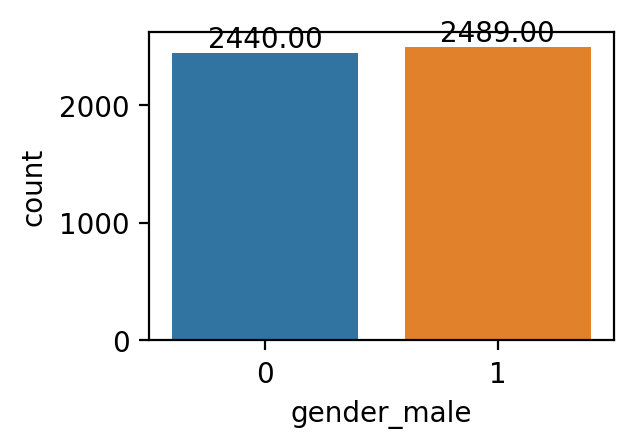


SENIOR_CITIZEN


senior_citizen  Count  Frequency
0               0   4109   0.833638
1               1    820   0.166362

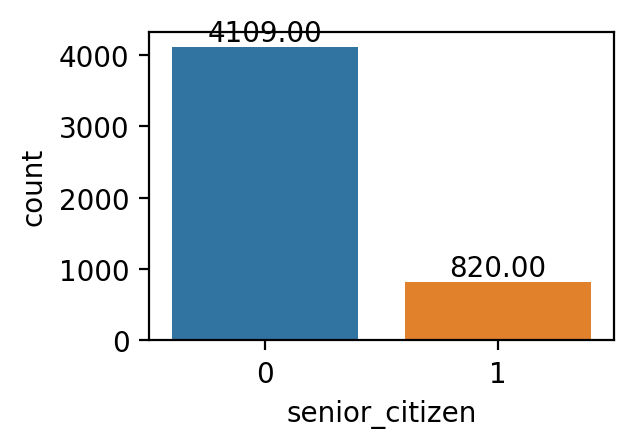


PARTNER


partner  Count  Frequency
0        0   2548   0.516941
1        1   2381   0.483059

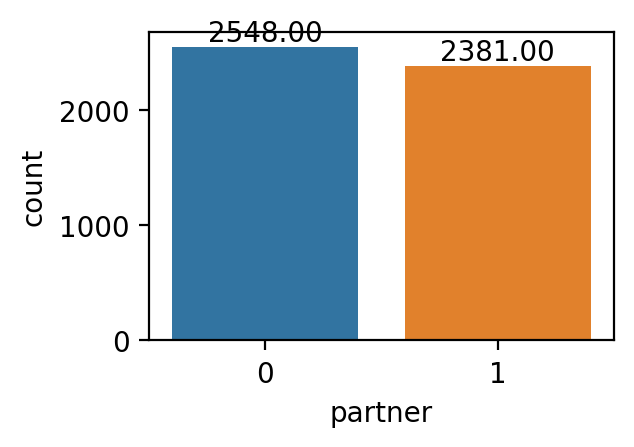


DEPENDENTS


dependents  Count  Frequency
0           0   3468   0.703591
1           1   1461   0.296409

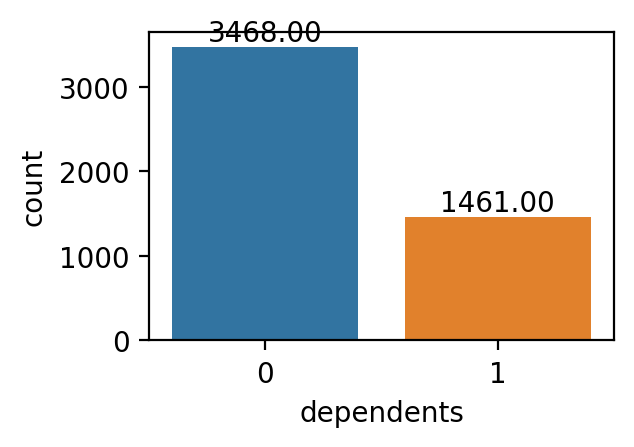


PHONE_SERVICE


phone_service  Count  Frequency
0              1   4440   0.900791
1              0    489   0.099209

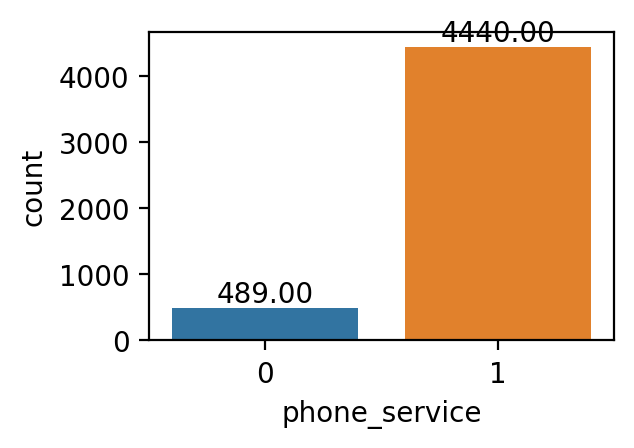


MULTIPLE_LINES


multiple_lines  Count  Frequency
0                No   2397   0.486306
1               Yes   2043   0.414486
2  No phone service    489   0.099209

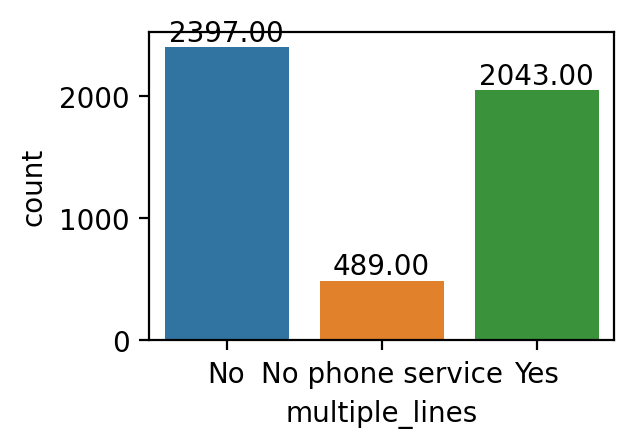


ONLINE_SECURITY


online_security  Count  Frequency
0                   No   2435   0.494015
1                  Yes   1400   0.284033
2  No internet service   1094   0.221952

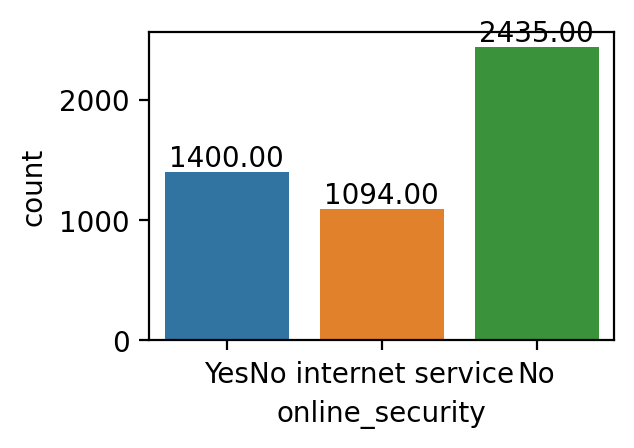


ONLINE_BACKUP


online_backup  Count  Frequency
0                   No   2128   0.431731
1                  Yes   1707   0.346318
2  No internet service   1094   0.221952

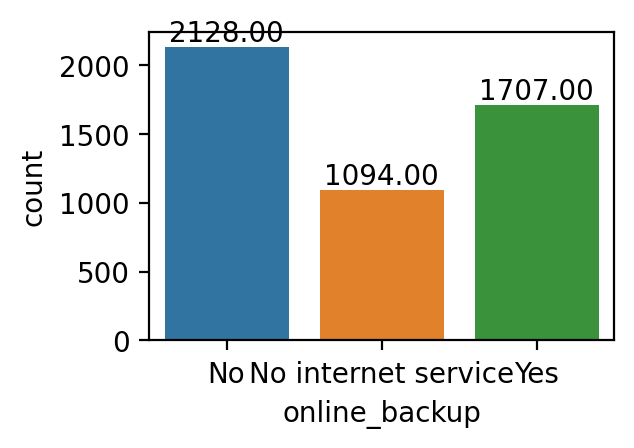


DEVICE_PROTECTION


device_protection  Count  Frequency
0                   No   2157   0.437614
1                  Yes   1678   0.340434
2  No internet service   1094   0.221952

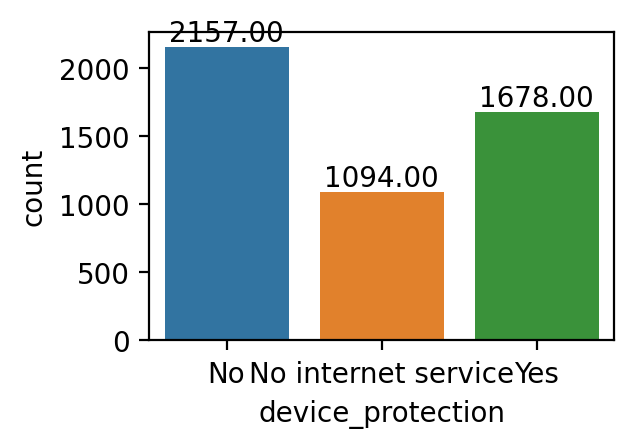


TECH_SUPPORT


tech_support  Count  Frequency
0                   No   2443   0.495638
1                  Yes   1392   0.282410
2  No internet service   1094   0.221952

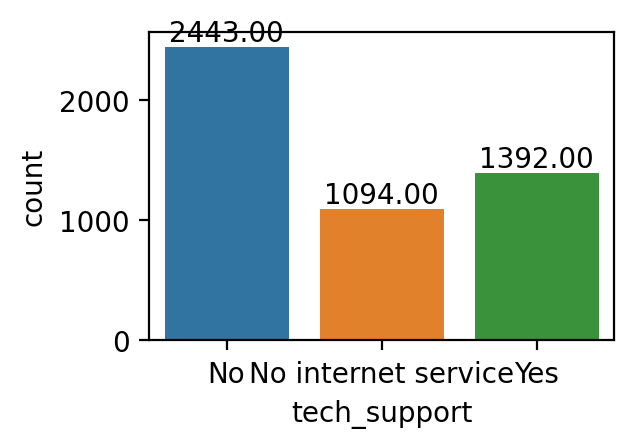


STREAMING_TV


streaming_tv  Count  Frequency
0                   No   1954   0.396429
1                  Yes   1881   0.381619
2  No internet service   1094   0.221952

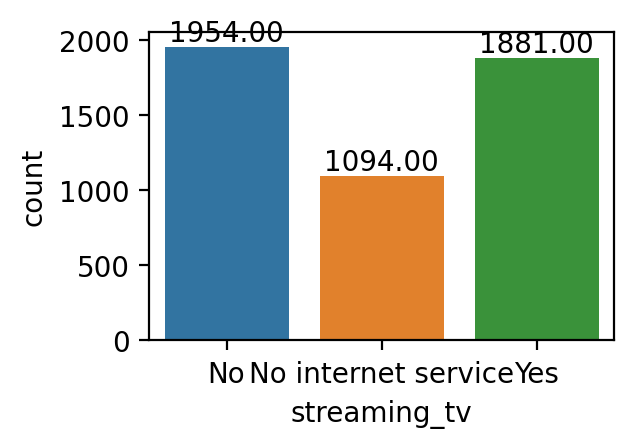


STREAMING_MOVIES


streaming_movies  Count  Frequency
0                   No   1947   0.395009
1                  Yes   1888   0.383039
2  No internet service   1094   0.221952

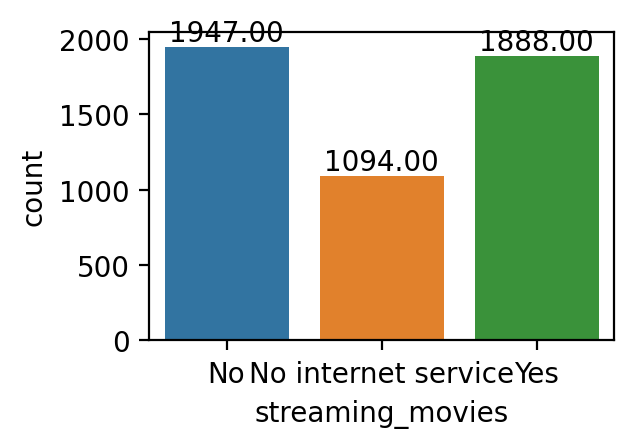


PAPERLESS_BILLING


paperless_billing  Count  Frequency
0                  1   2891   0.586529
1                  0   2038   0.413471

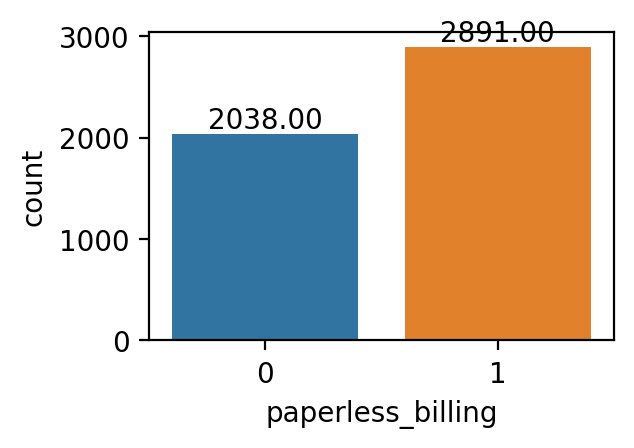


CHURN


churn  Count  Frequency
0      0   3621   0.734632
1      1   1308   0.265368

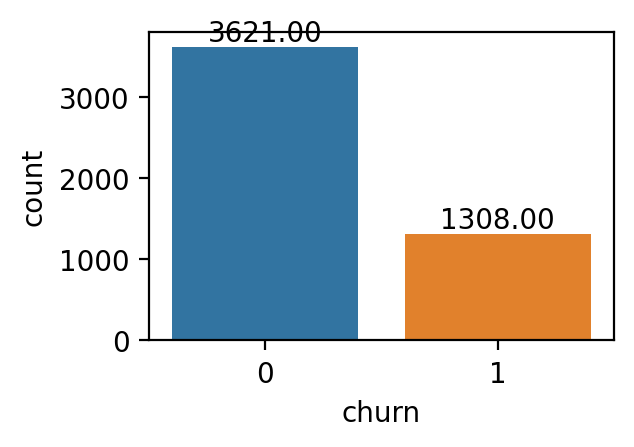


CONTRACT_TYPE


contract_type  Count  Frequency
0  Month-to-month   2708   0.549402
1        Two year   1194   0.242240
2        One year   1027   0.208359

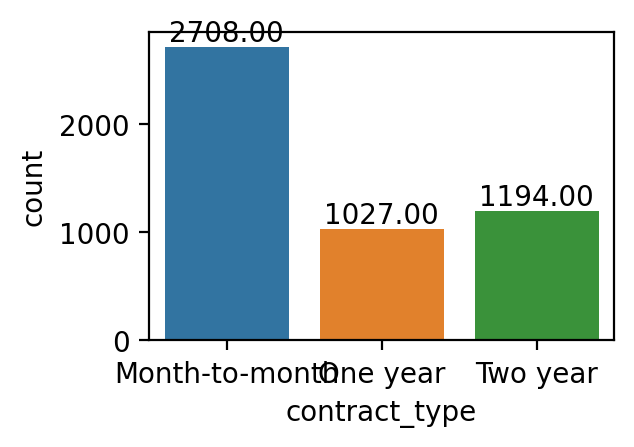


INTERNET_SERVICE_TYPE


internet_service_type  Count  Frequency
0           Fiber optic   2150   0.436194
1                   DSL   1685   0.341854
2                  None   1094   0.221952

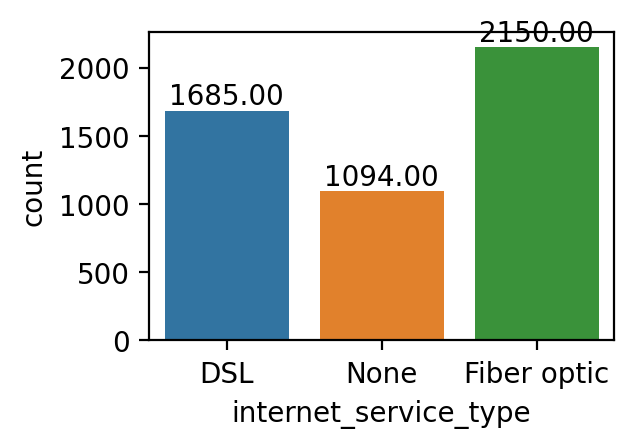


PAYMENT_TYPE


payment_type  Count  Frequency
0           Electronic check   1650   0.334753
1               Mailed check   1156   0.234530
2  Bank transfer (automatic)   1068   0.216677
3    Credit card (automatic)   1055   0.214039

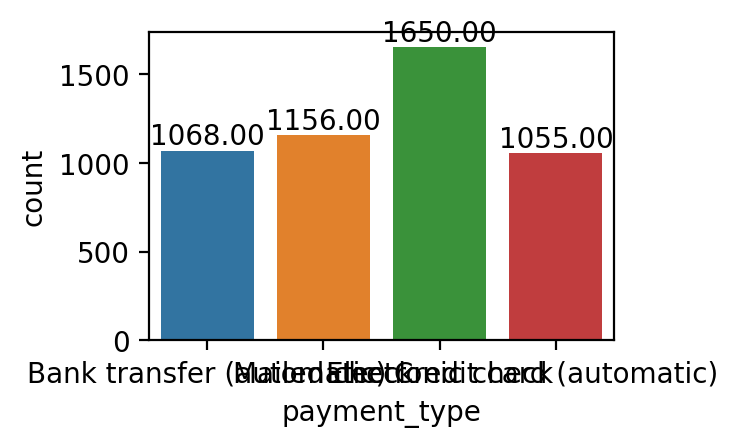

In [11]:
e.explore_univariate_categorical_cols(telco, cat_cols=cat_cols)

Customer insights:
- 26.5% churn
- 50% males
- 16.5% seniors
- 48% have a partner
- 29% have dependent(s)
- 90% have phone service
    - 45% have multiple lines
- 78% have internet service
    - 55% have fiber optic
    - ~50% stream movies, stream tv
    - ~35% have tech support, online security
    - ~40% have device protection, online backup
- 59% of billing is paperless
- 55% of contracts are month-to-month
- payment types are about even with 33% paying by electronic check

Continuous

Descriptive Stats:



tenure  monthly_charges  total_charges
count  4929.000000      4929.000000    4929.000000
mean     32.303307        64.322773    2264.433465
std      24.530831        30.211385    2256.147635
min       0.000000        18.250000      18.850000
25%       9.000000        34.650000     389.950000
50%      29.000000        70.250000    1378.450000
75%      55.000000        89.750000    3782.400000
max      72.000000       118.750000    8684.800000

------------------------------------------------------------ 
 TENURE 

Most Frequent Values:
1     443
72    233
2     166
Name: tenure, dtype: int64


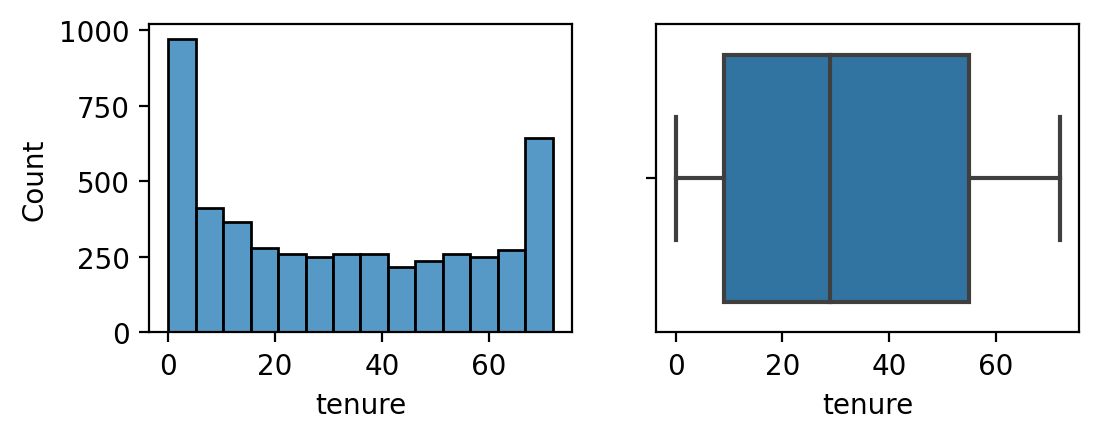


------------------------------------------------------------ 
 MONTHLY_CHARGES 

Most Frequent Values:
20.05    47
19.95    37
19.85    34
Name: monthly_charges, dtype: int64


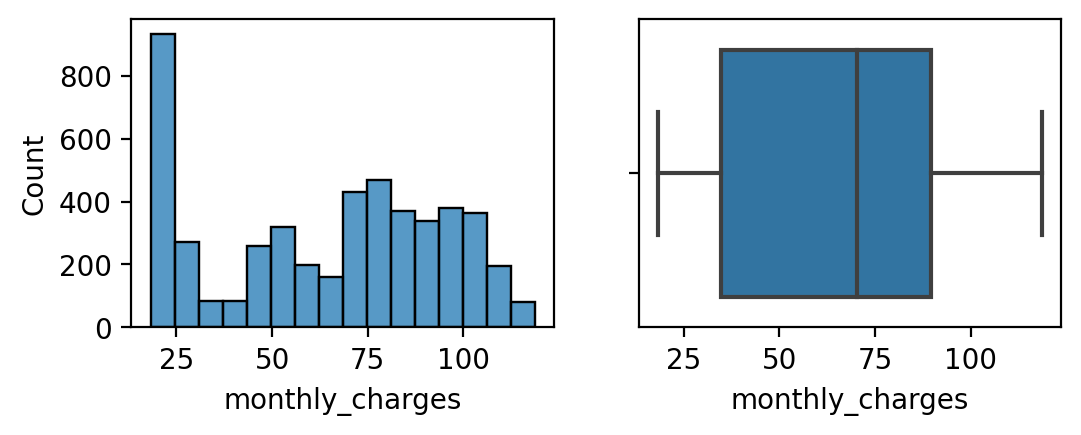


------------------------------------------------------------ 
 TOTAL_CHARGES 

Most Frequent Values:
19.750      9
20.200      8
1397.475    8
Name: total_charges, dtype: int64


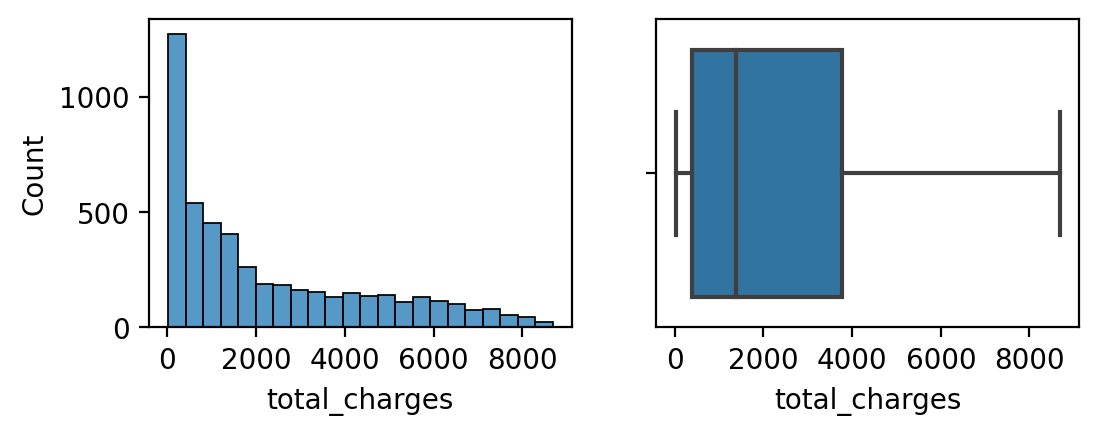

In [12]:
e.explore_univariate_continuous_cols(telco, cont_cols=cont_cols)

204 entries have a tenure of 72. Checkout in prep

Investigate customers with tenure of 72. May have missed duplicate customers (with different IDs).
- checked and saw no duplicates

Customer Insights:
- Tenure: mean of 32, median of 28, min/max 0/72
- Monthly Charges: mean of \~64, median of \~70, min/max \~18/\~119
- Total Charges: mean of \~2222, median of \~1328, min/max \~19/\~8,685

###### 1C. Bivariate Stats

Categorical feartures to target

customer_id is continuous but not numeric. Check if column needs to be cleaned
Categorical feature (integer-type) "correlations" (Pearson R) to churn:


churn                                    1.000000
internet_service_type_fiber_optic        0.298779
payment_type_electronic_check            0.287382
paperless_billing                        0.181781
senior_citizen                           0.149788
streaming_tv_yes                         0.056604
streaming_movies_yes                     0.050082
multiple_lines_yes                       0.030643
multiple_lines_no_phone_service          0.004972
phone_service                           -0.004972
gender_male                             -0.016085
device_protection_yes                   -0.071067
payment_type_mailed_check               -0.079997
online_backup_yes                       -0.085935
payment_type_credit_card_(automatic)    -0.122072
partner                                 -0.141461
dependents                              -0.158678
tech_support_yes                        -0.163715
contract_type_one_year                  -0.172574
online_security_yes                     -0.177822


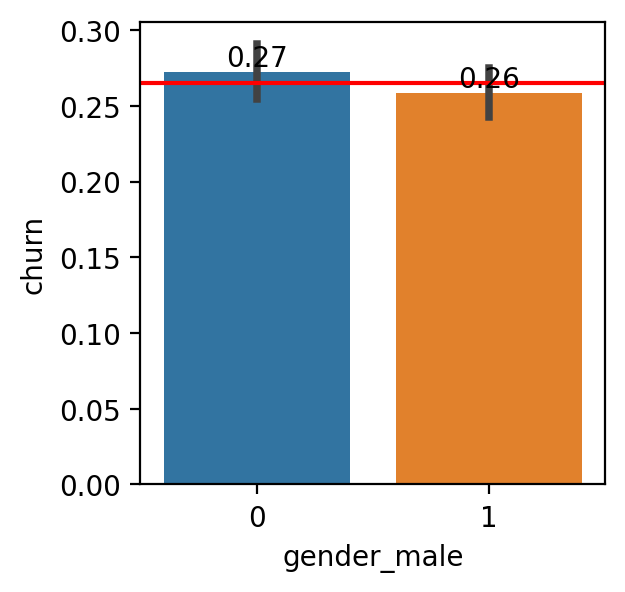

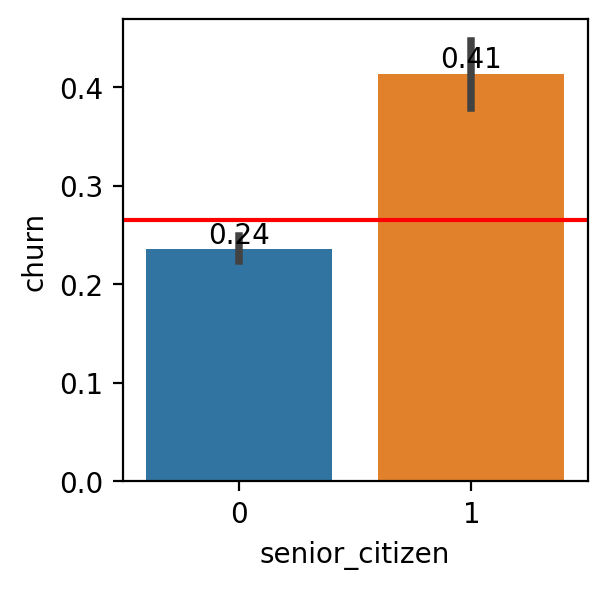

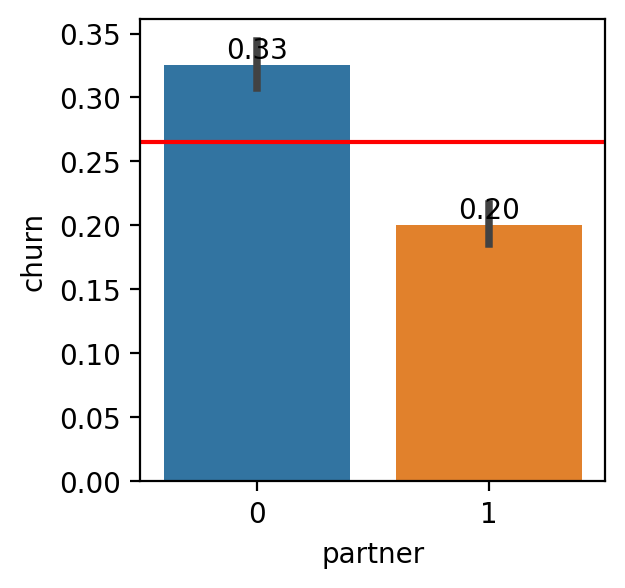

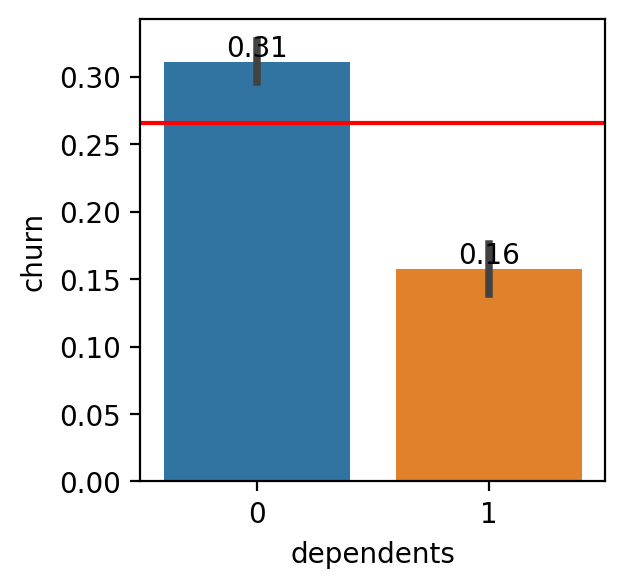

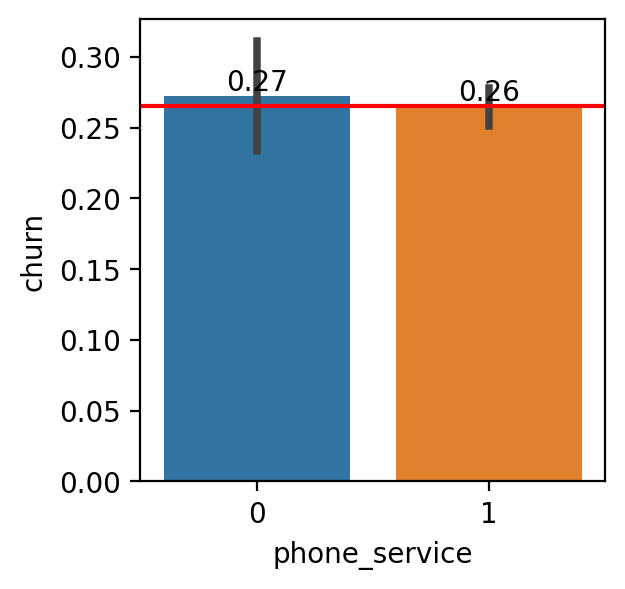

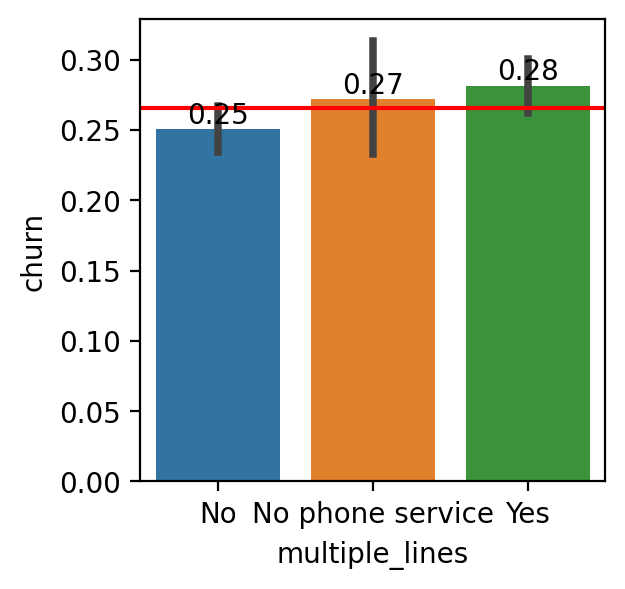

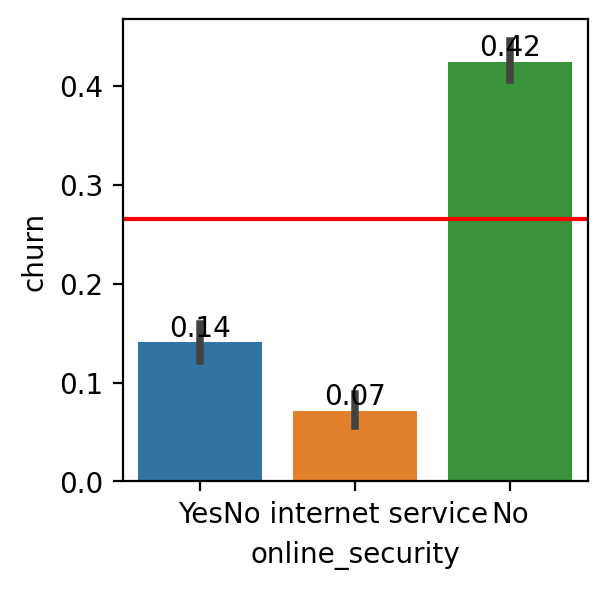

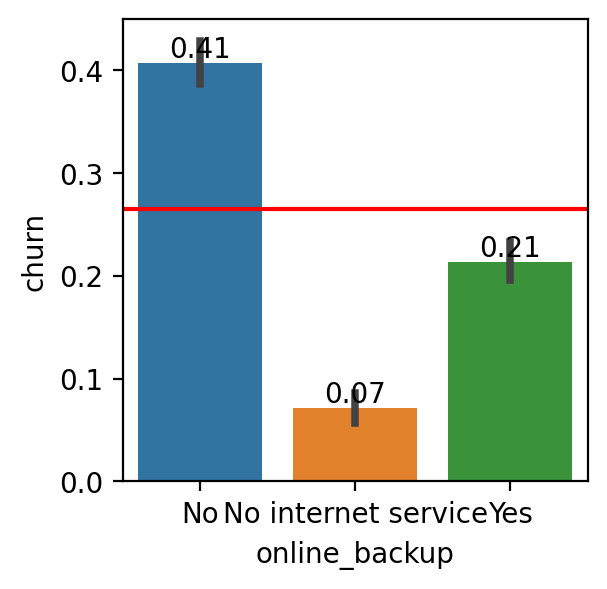

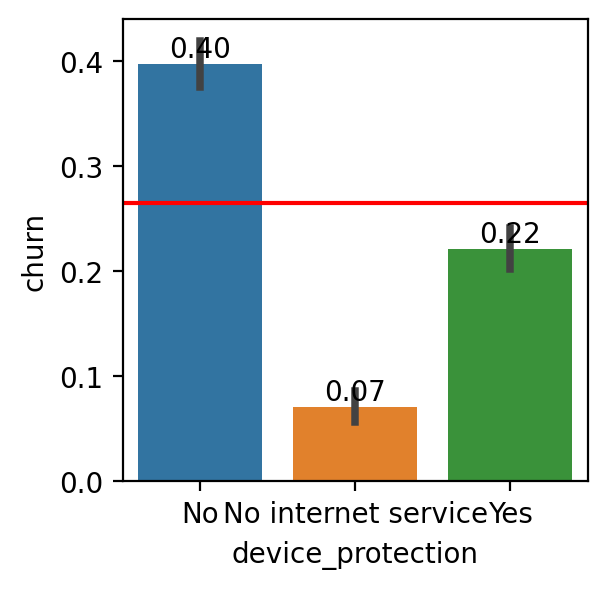

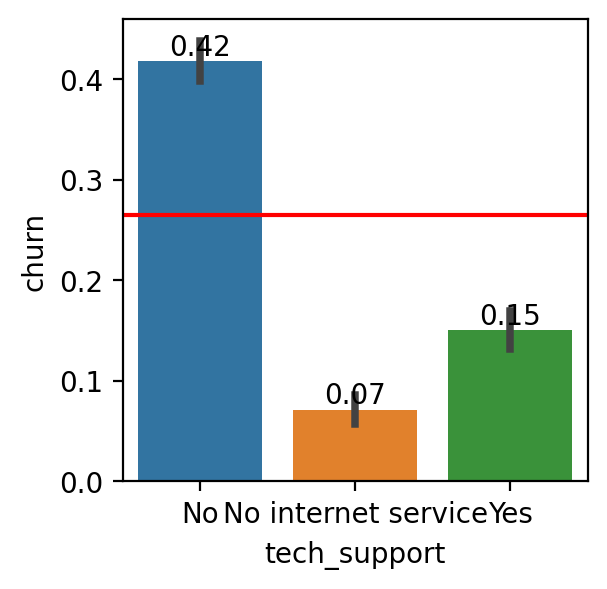

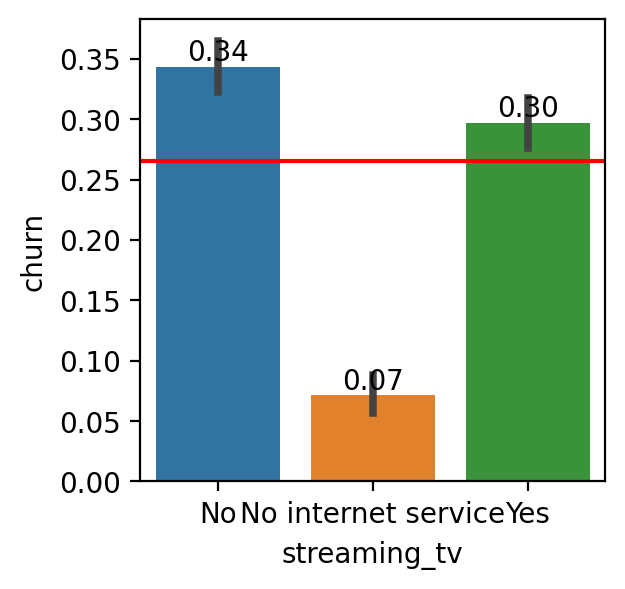

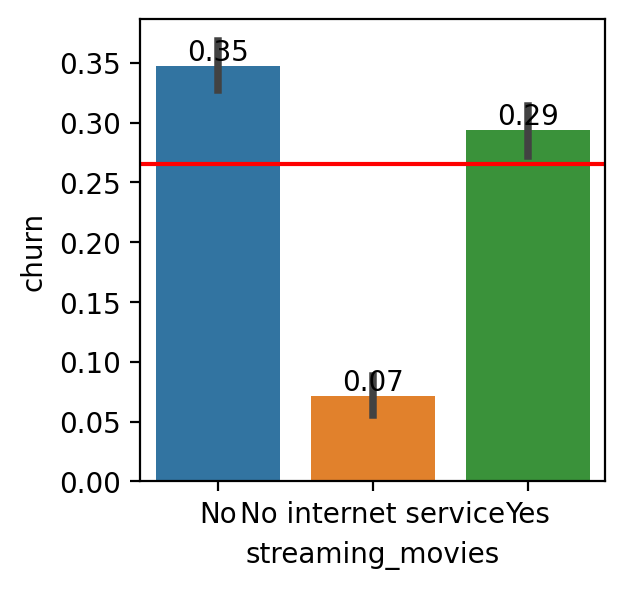

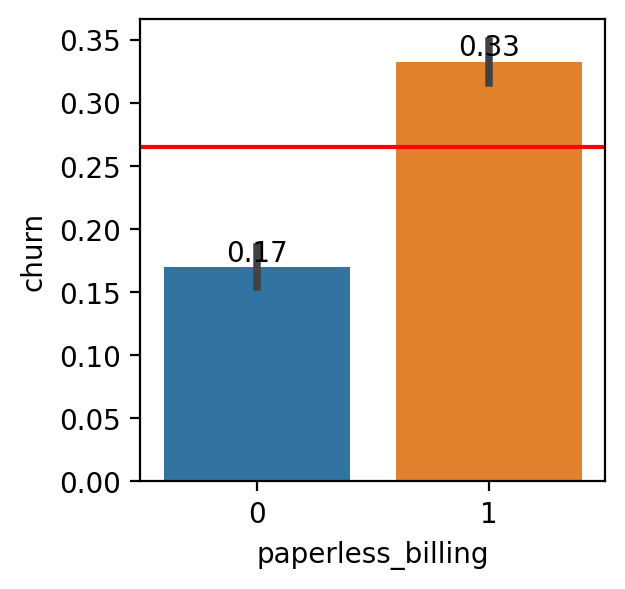

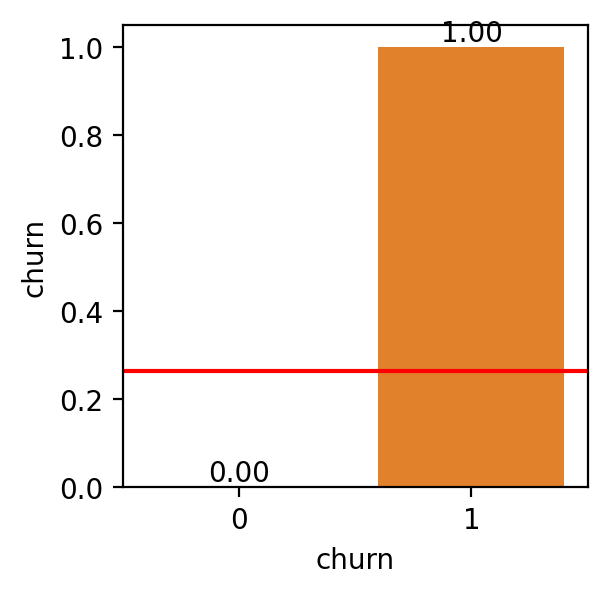

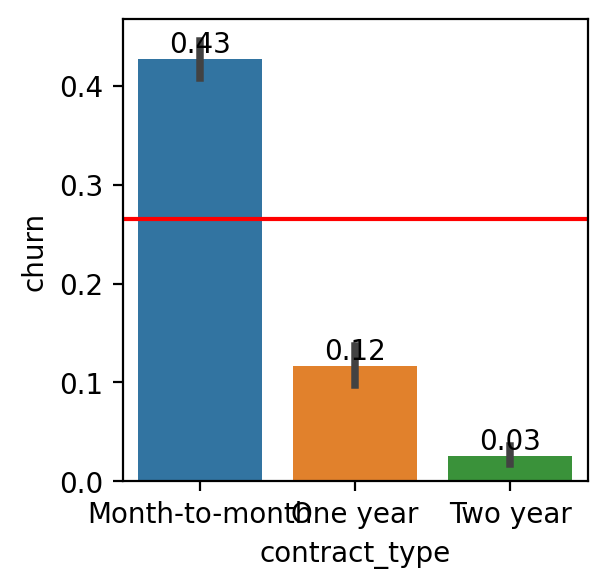

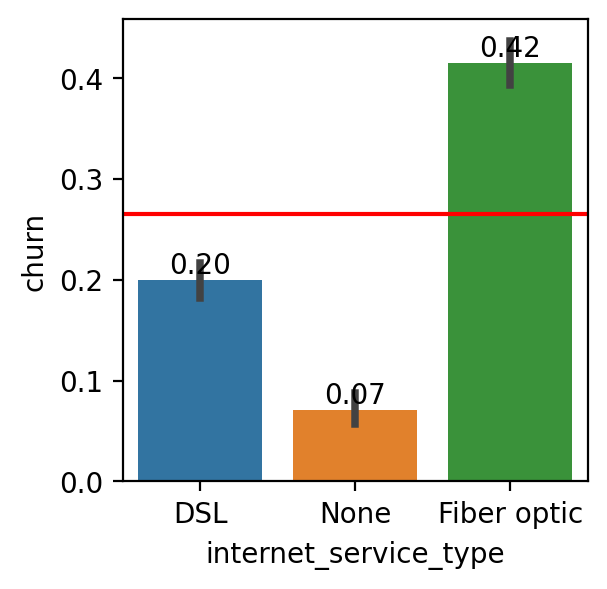

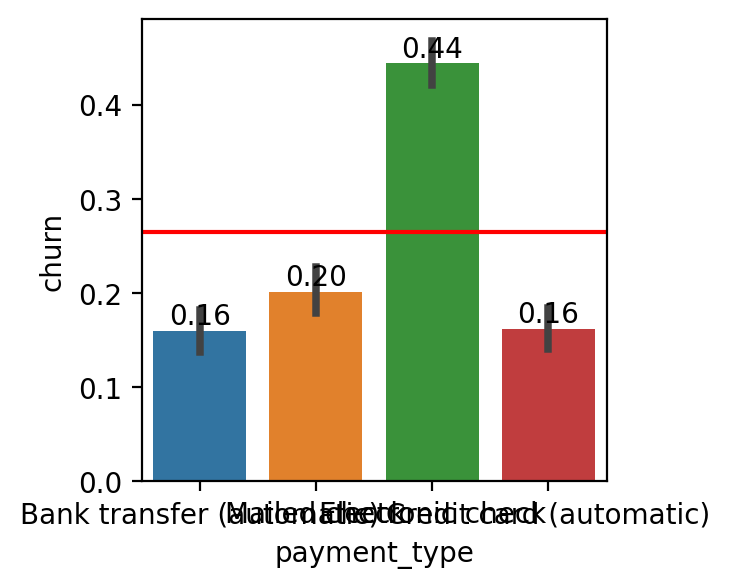

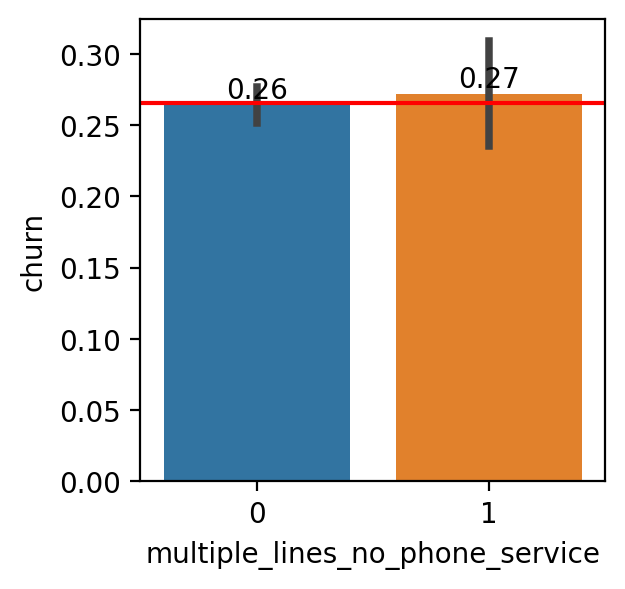

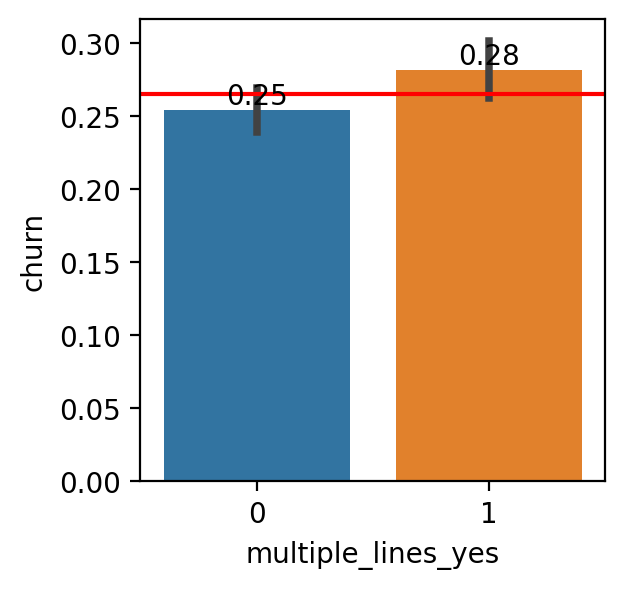

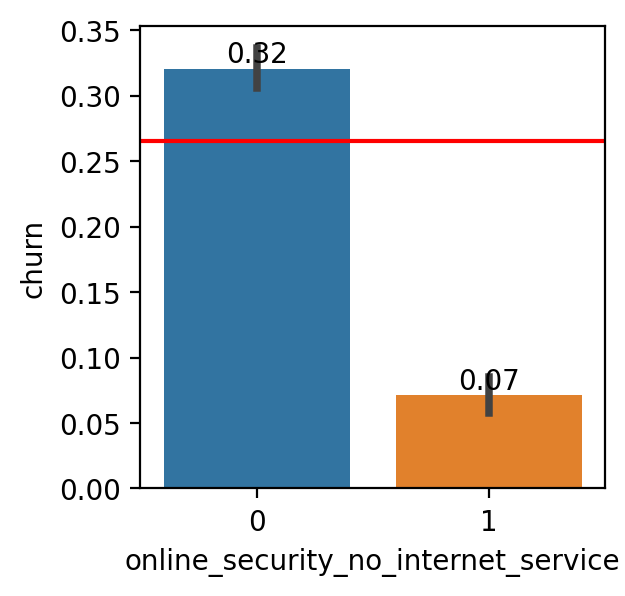

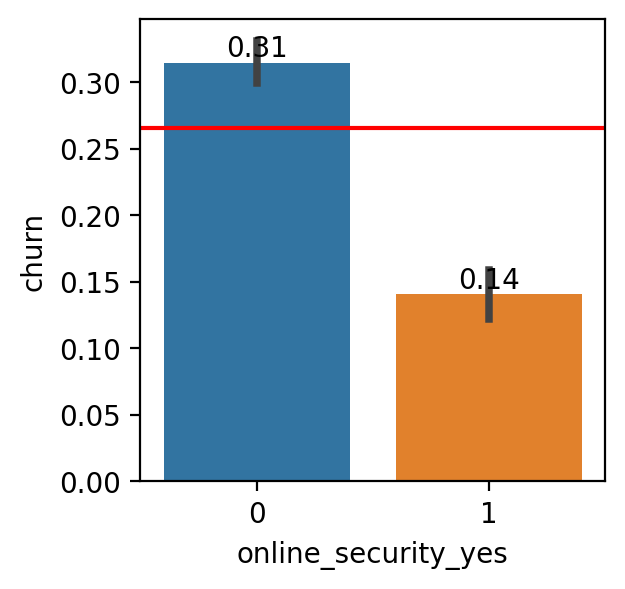

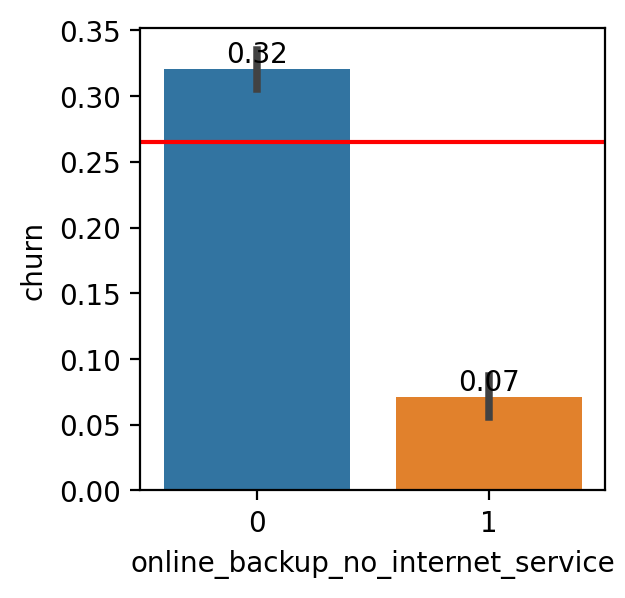

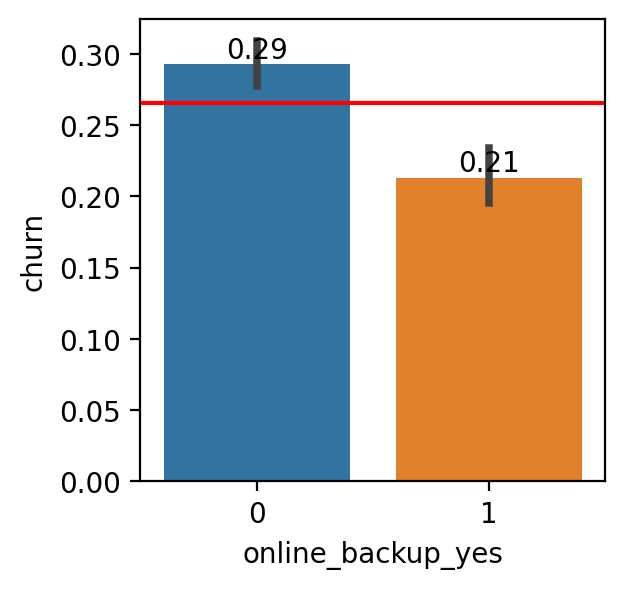

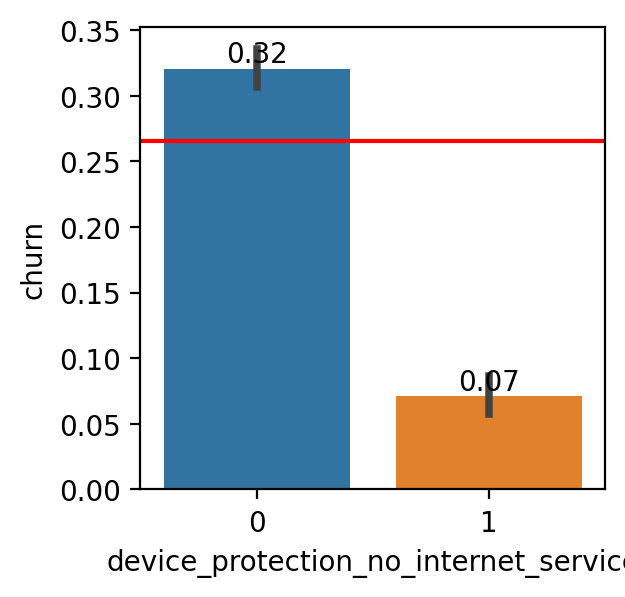

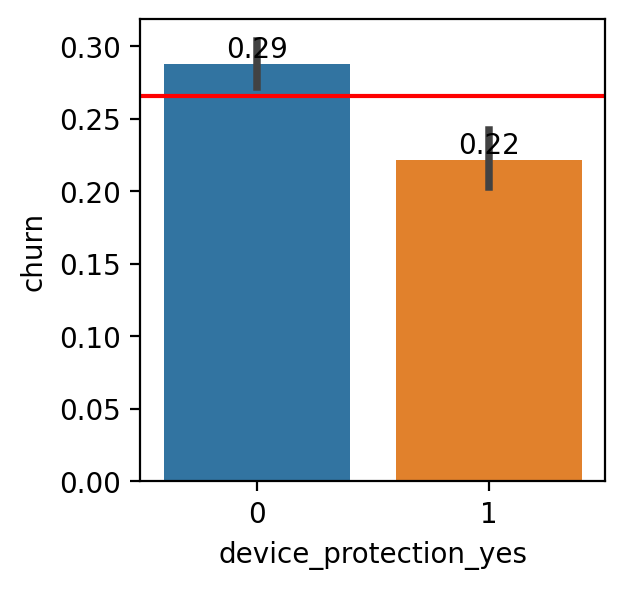

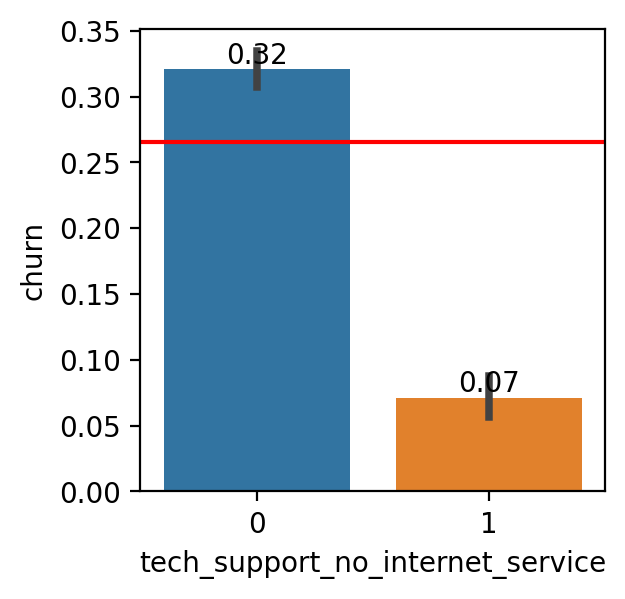

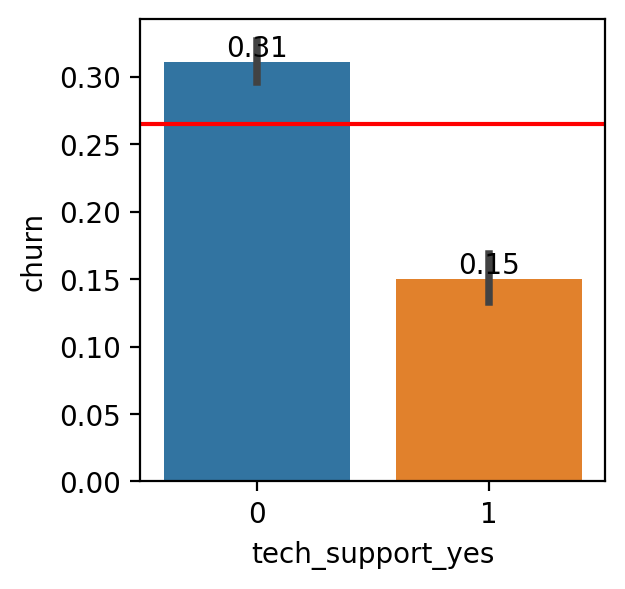

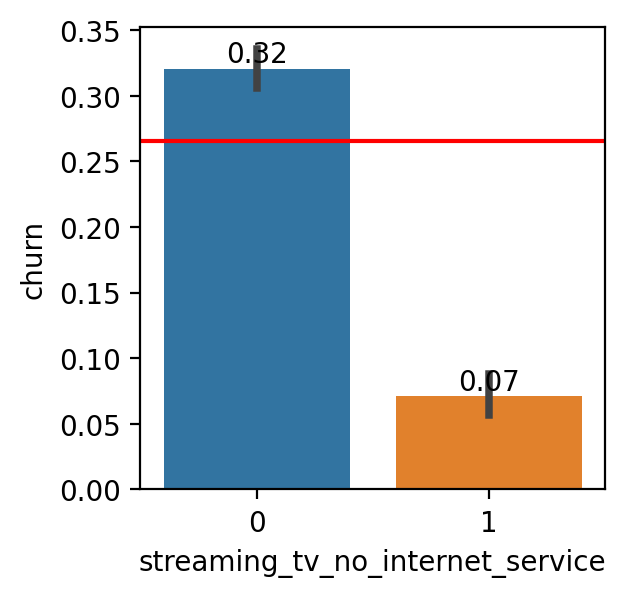

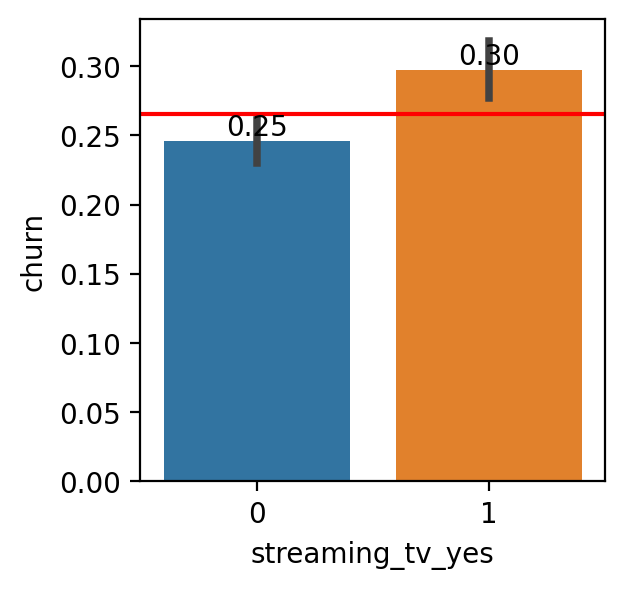

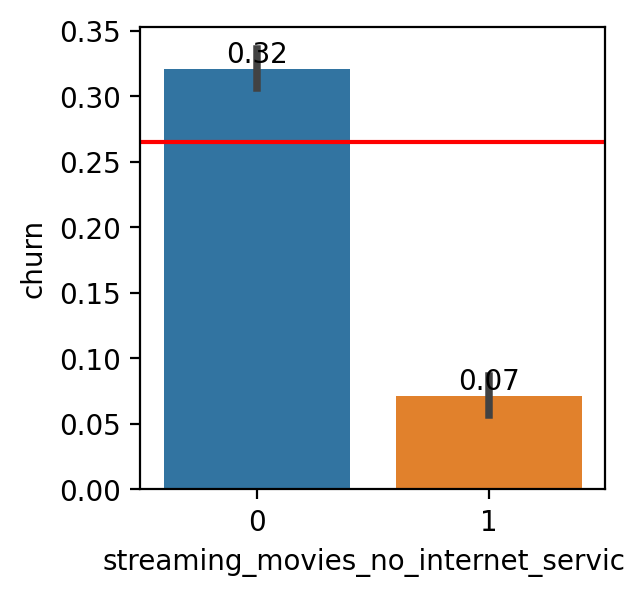

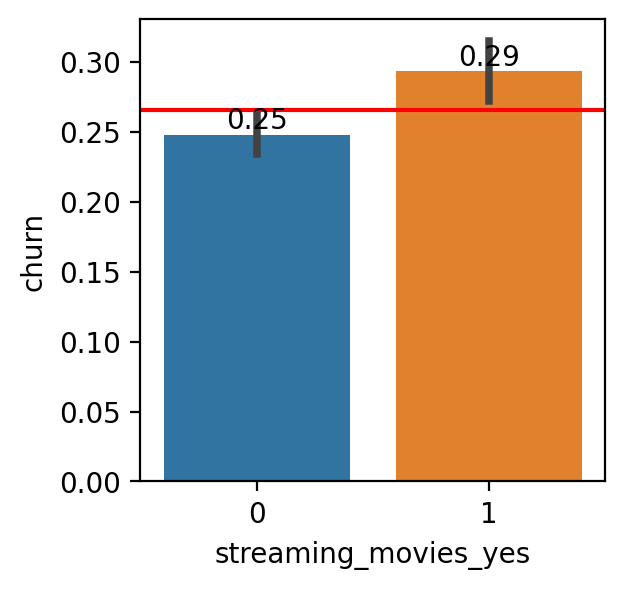

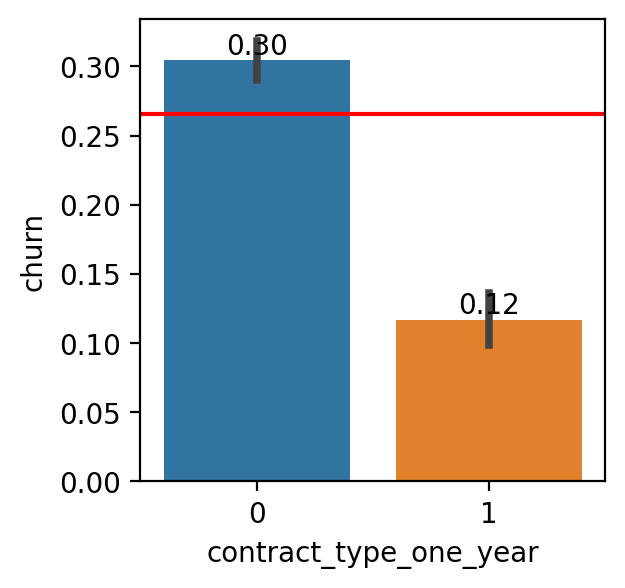

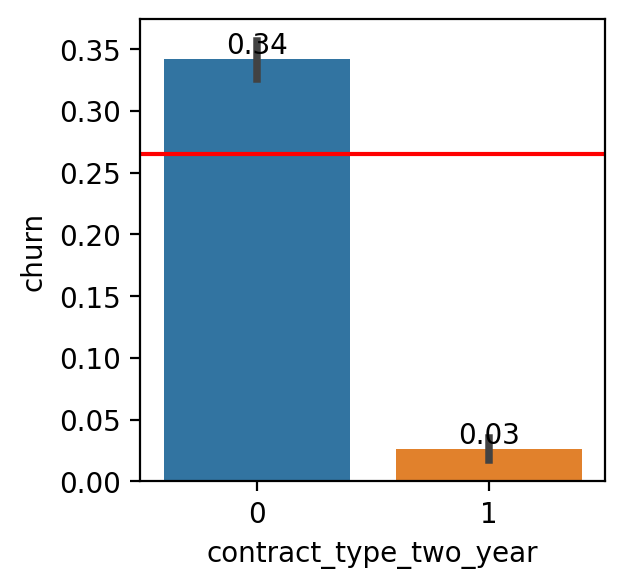

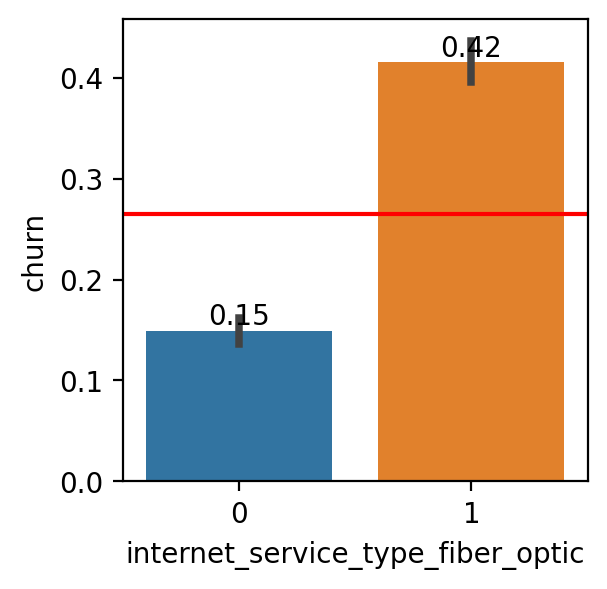

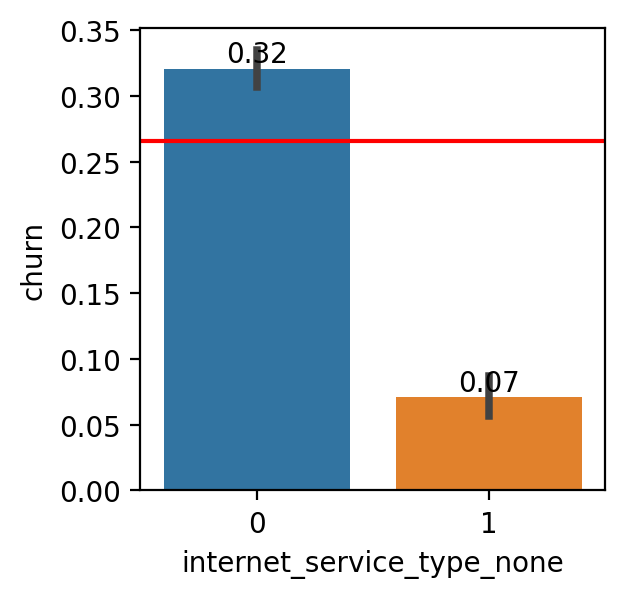

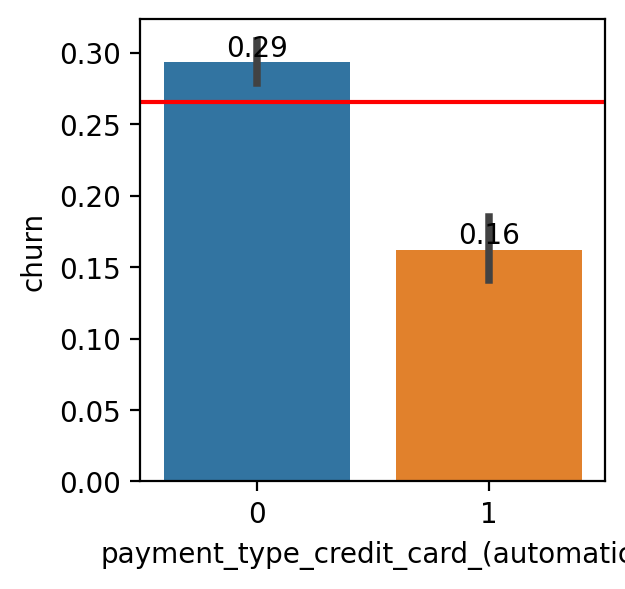

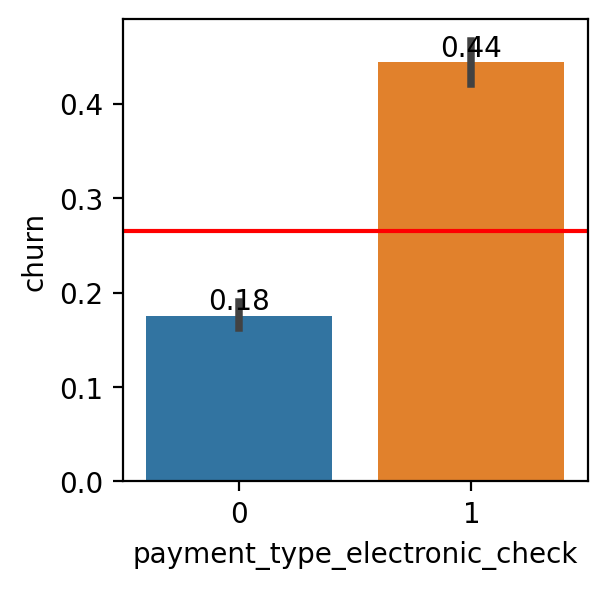

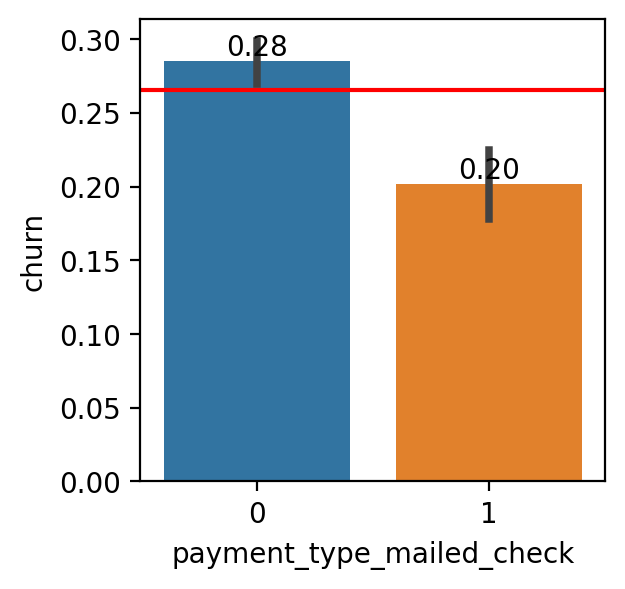

/Users/martinreyes/codeup-data-science/classification-project-predict-churning-customers/explore.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())
/Users/martinreyes/codeup-data-science/classification-project-predict-churning-customers/explore.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, cmap='coolwarm',


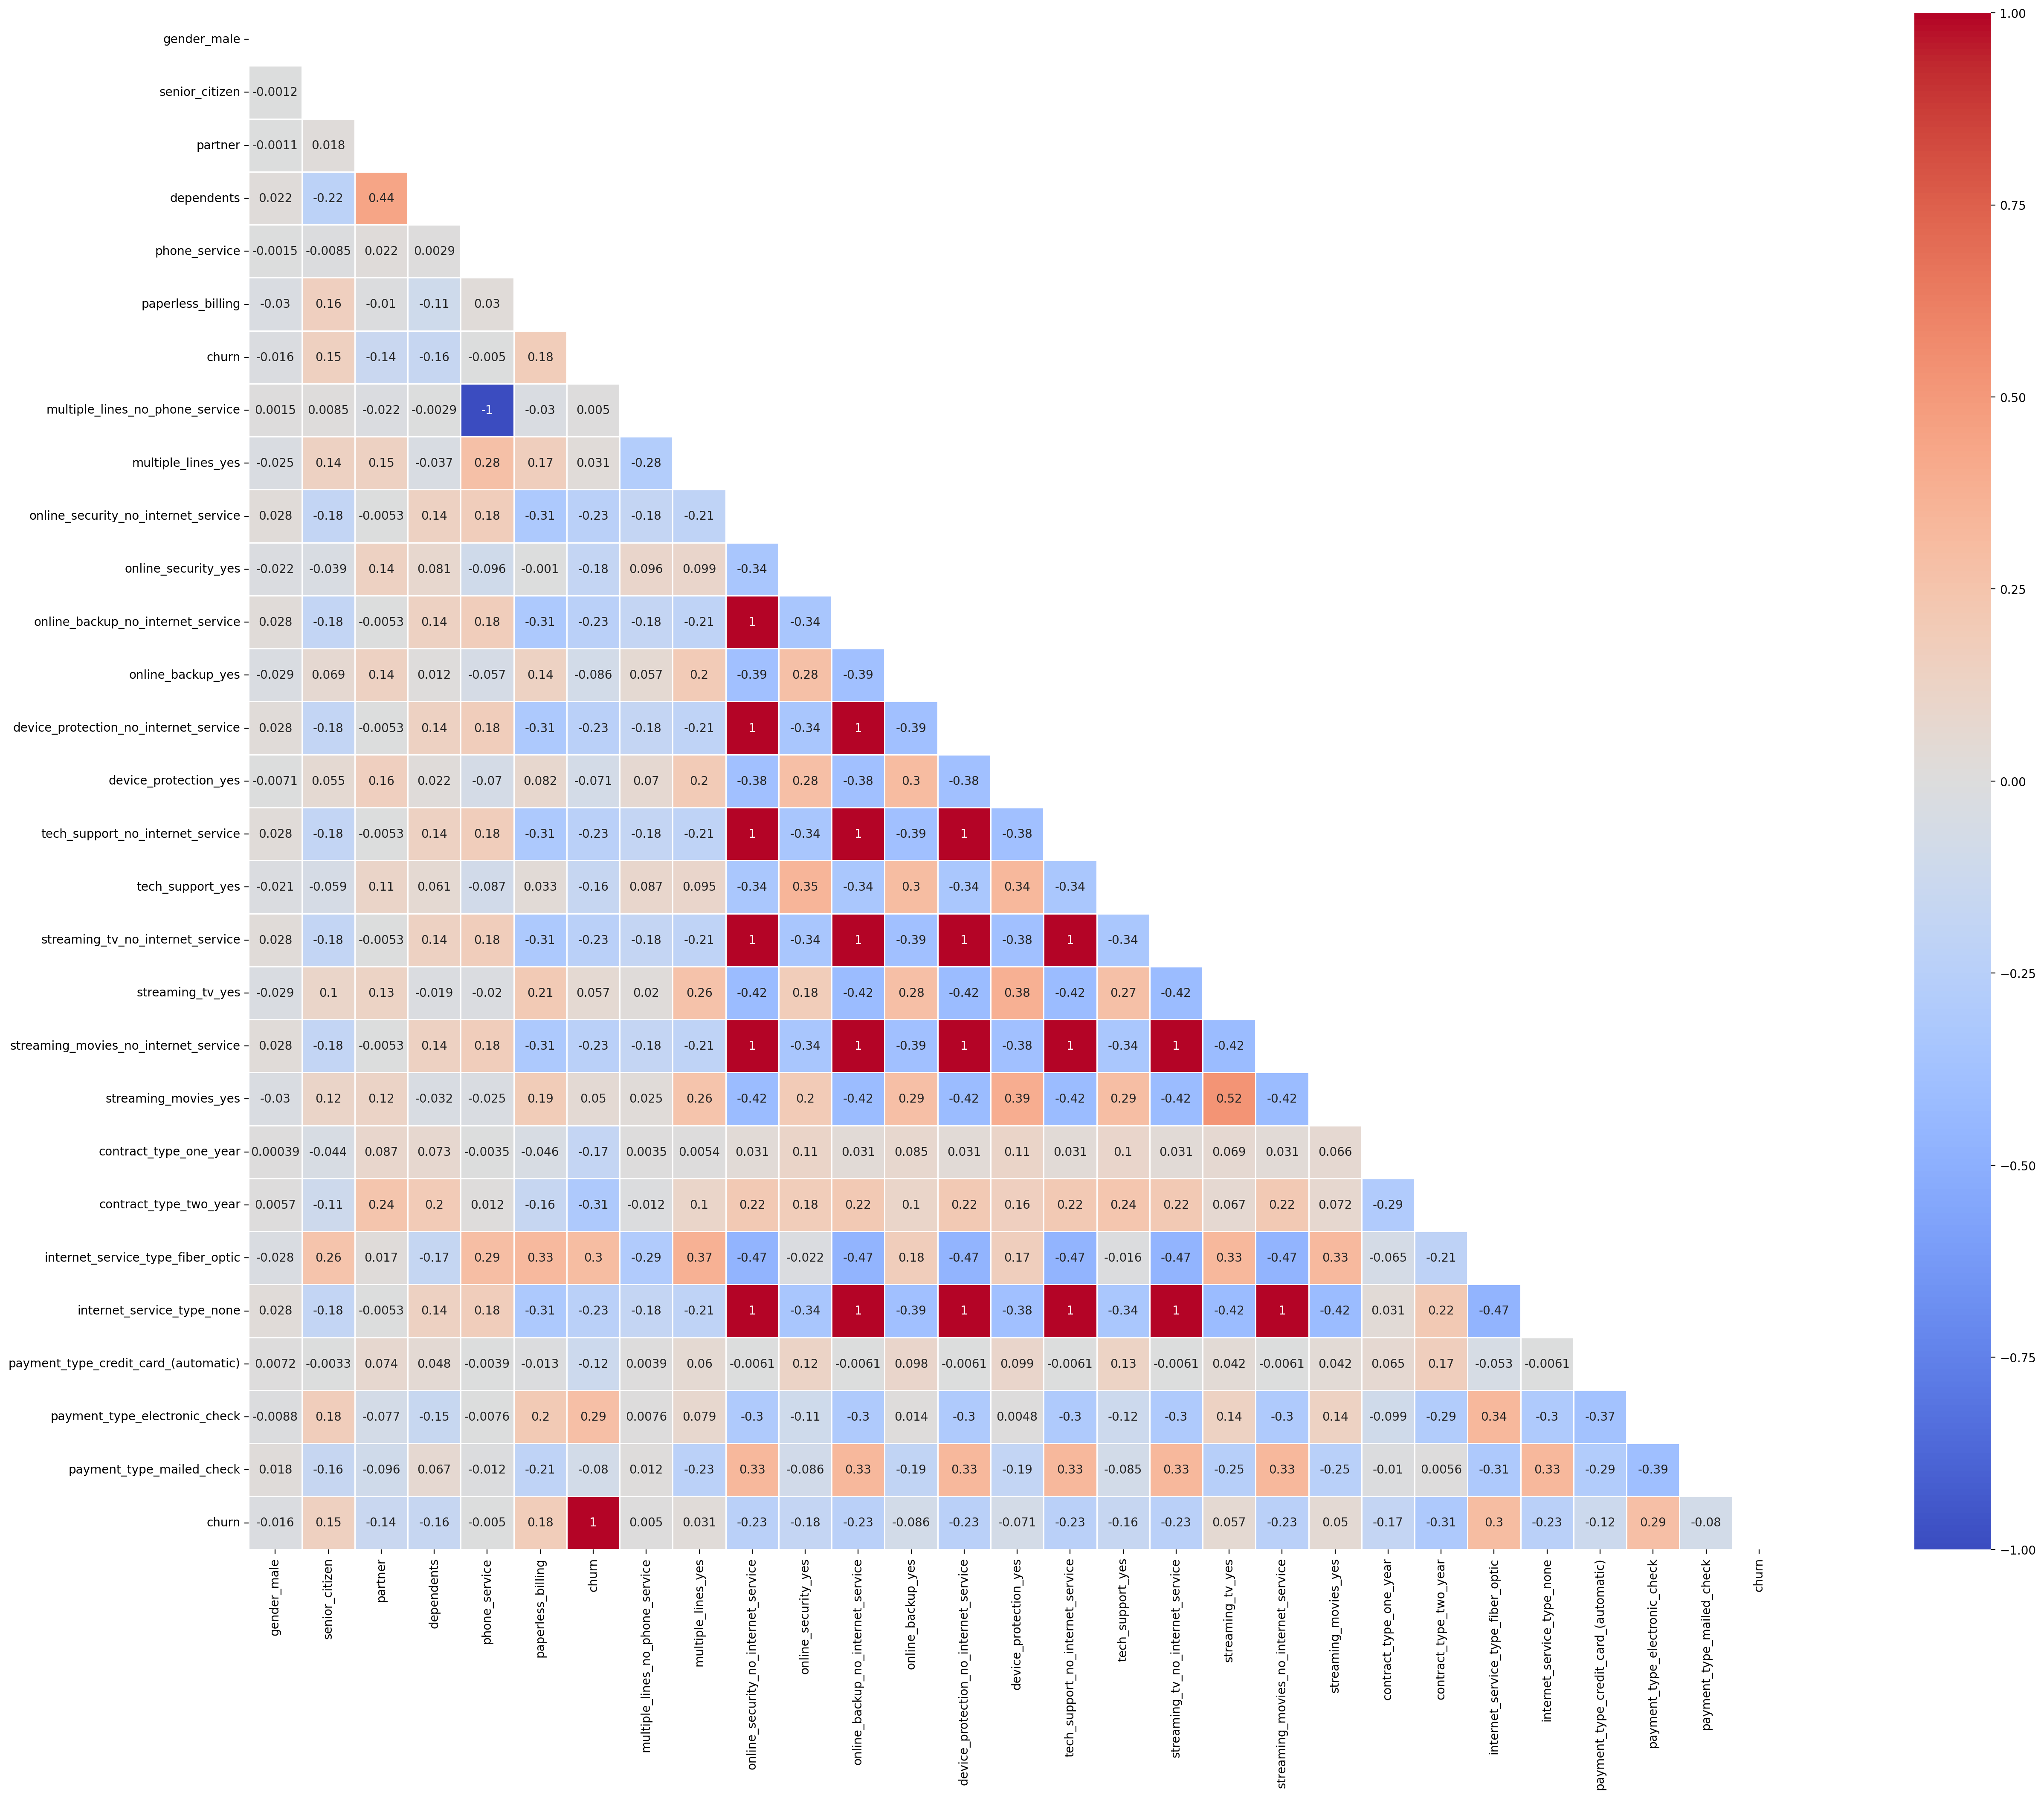

In [13]:
e.explore_bivariate_cat_to_cat_target(df=telco, target='churn')

Insights:
- Strong drivers of churn: 40%+ churn rate 
    - payment by electronic check
    - fiber optic internet service type
    - not being on a two-year contract
    - being on a month-to-month contract
    - not having online security    
- Moderate drives of churn
    - paperless billing
    - being a senior
    - not having tech support, online backup, or device protection
- Weak drivers of churn: ~27% churn rate
    - gender
    - having a phone service
    - having multiple lines
    - streaming TVs and movies
    - mailed check payment type


Strong Features to use for modeling
- `internet_service_type_fiber_optic`, `contract_type_two_year `, `payment_type_electronic_check`, `internet_service_type_none`, `contract_type_one_year `, `online_security_no_internet_service`, 
`online_security_yes`

Continuous feartures to target

churn                            0            1
tenure          count  3621.000000  1308.000000
                mean     37.560066    17.750765
                std      24.044125    19.473222
                min       0.000000     1.000000
                25%      15.000000     2.000000
                50%      38.000000     9.000000
                75%      61.000000    29.000000
                max      72.000000    72.000000
monthly_charges count  3621.000000  1308.000000
                mean     60.988622    73.552867
                std      31.330038    24.631123
                min      18.250000    18.850000
                25%      25.000000    55.150000
                50%      64.400000    79.150000
                75%      88.800000    93.587500
                max     118.750000   117.800000
total_charges   count  3621.000000  1308.000000
                mean   2539.605537  1502.661239
                std    2318.401680  1874.782579
                min      19.000000    18.850000
                25%     580.800000   112.250000
                50%    1672.100000   669.650000
                75%    4254.100000  2325.400000
                max    8672.450000  8684.800000

Continuous feature correlations (Pearson R) to churn:


churn              1.000000
monthly_charges    0.183641
total_charges     -0.202951
tenure            -0.356583
Name: churn, dtype: float64

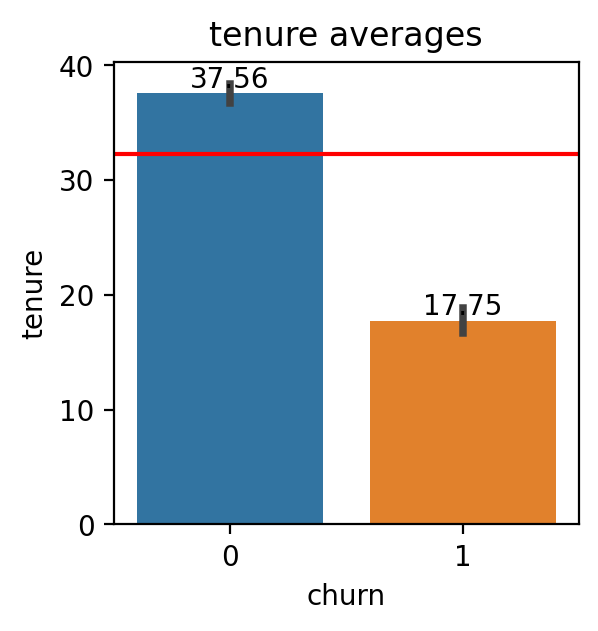

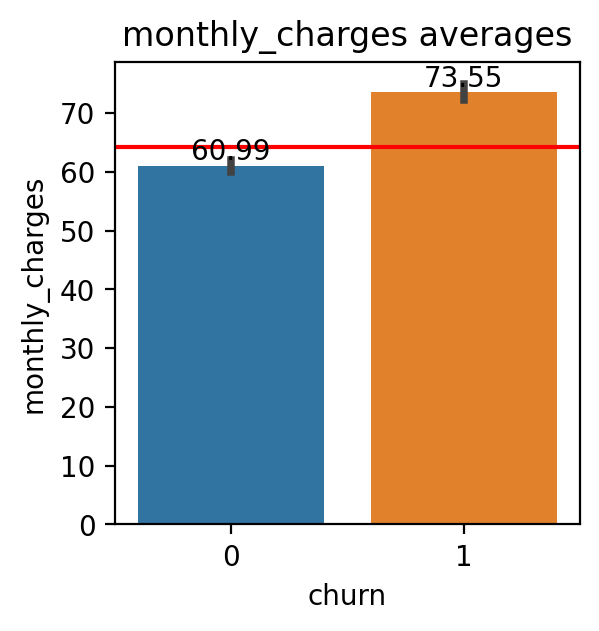

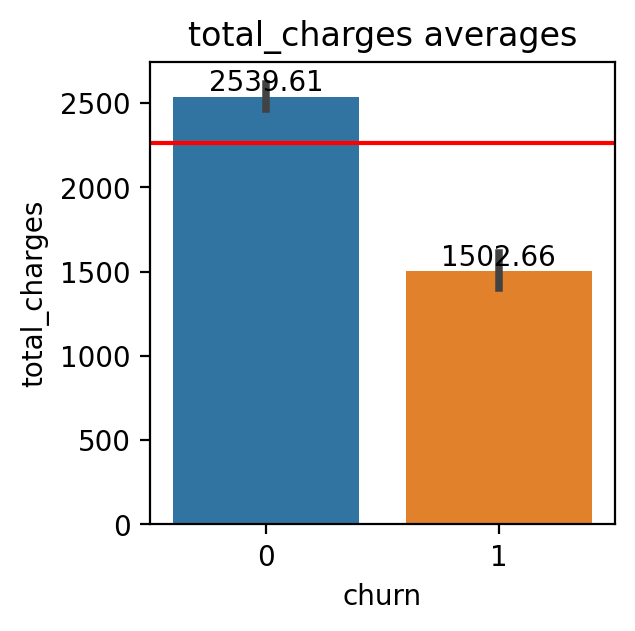

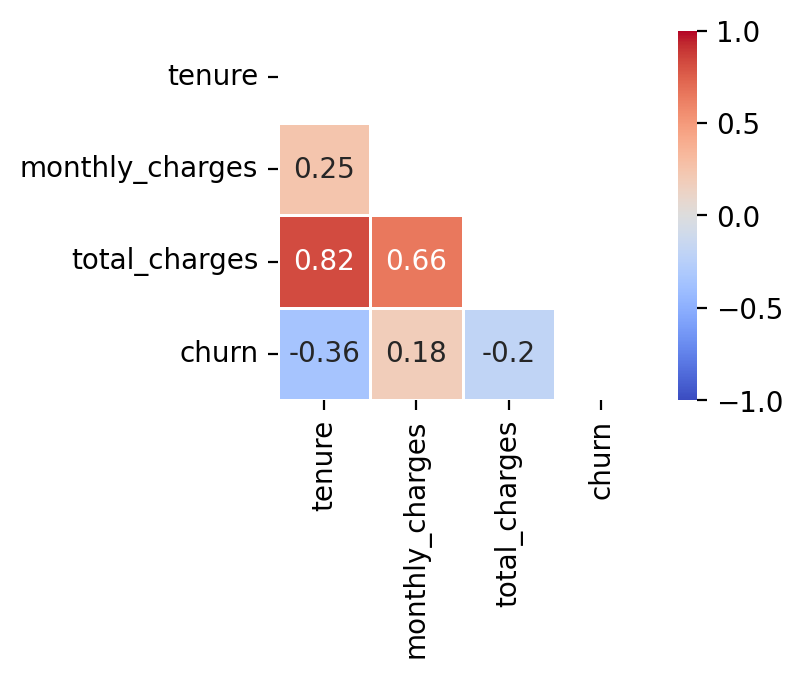

In [14]:
e.explore_bivariate_cont_to_cat_target(df=telco, target='churn', cont_cols=cont_cols)

Insights:
- Less tenure relates to more churn.
- Higher monthly charges leads to more churn, but this relationship isn't as strong as tenure
- Lower total charges leads to more churn, but this relationship isn't as strong as tenure
- Total charges is related to tenure so we won't run both in the model.
- For our first run of modeling, the only continuous feature we will use is `tenure`.

###### 1D. Answer specific questions

- How do the following features relate to churn?:
    - tenure
    - internet service types
    - paying by electronic check
    - contract type
    - gender

Tenure relation to churn

###### 2. Visualize

Text(0.5, 1.0, 'Tenure Distribution of Churned Customers')

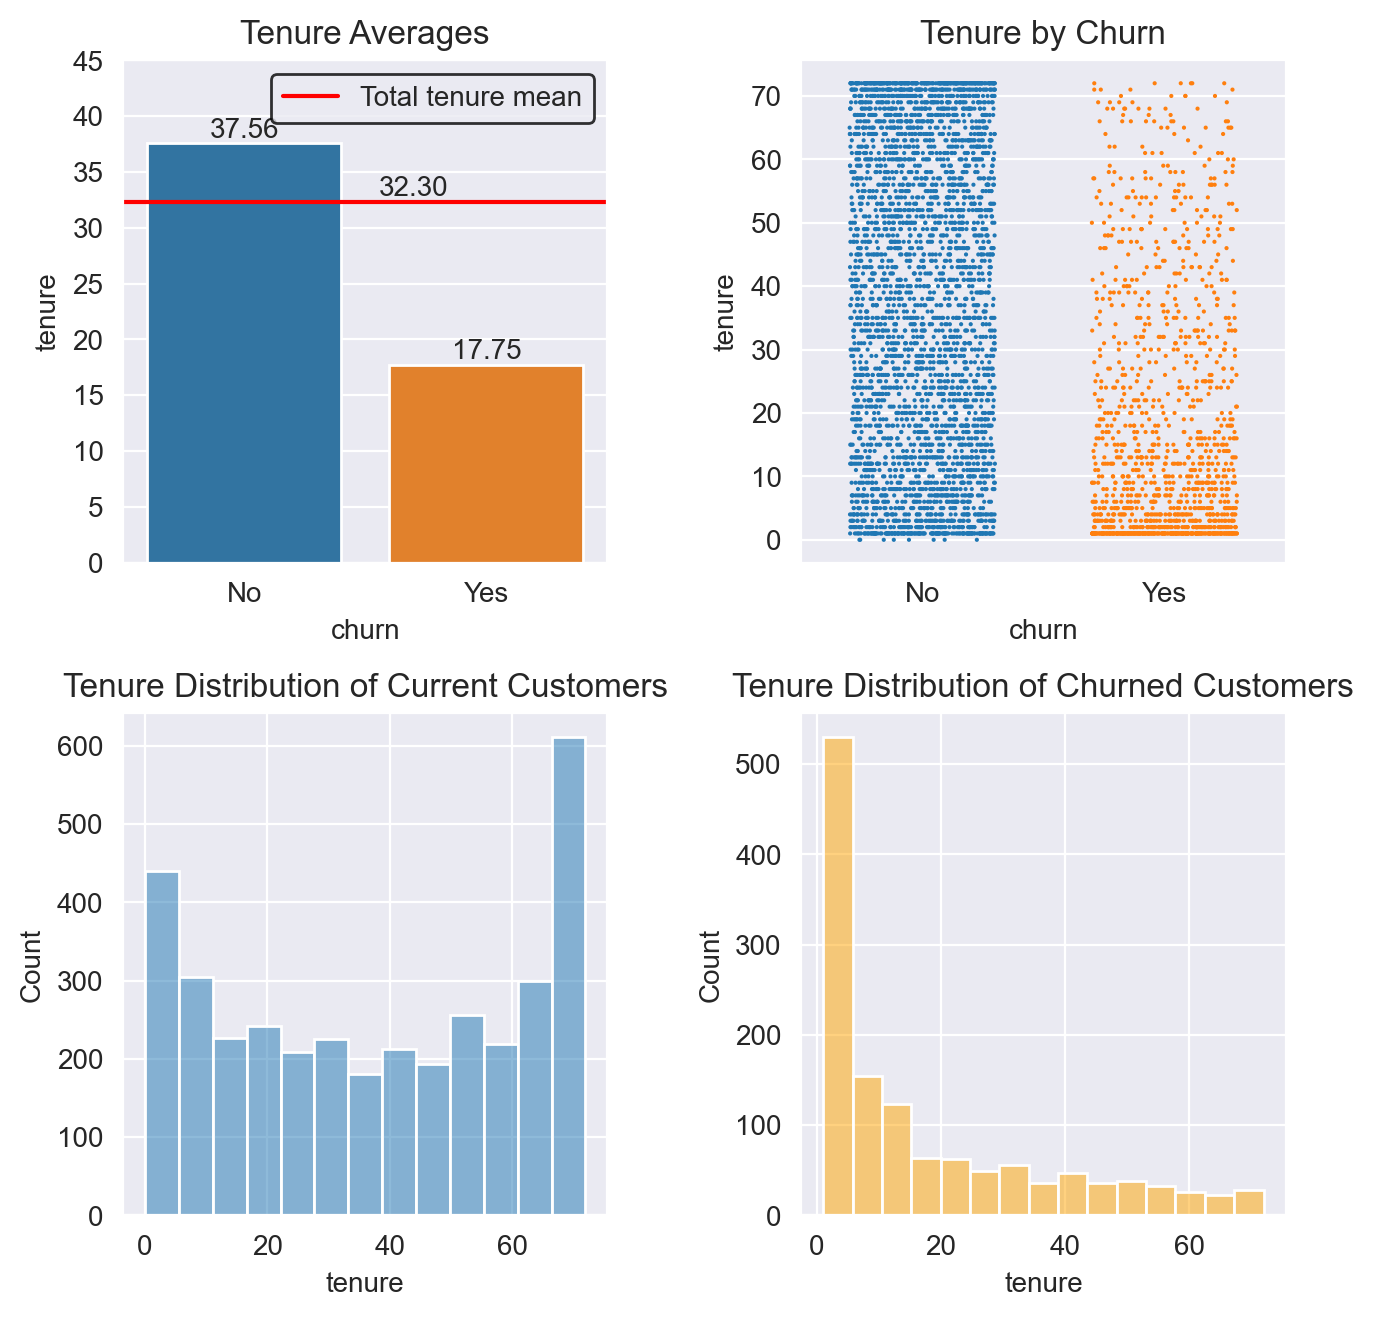

In [15]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(7.5, 7.5))
plt.subplots_adjust(hspace=.3, wspace=0.4)

# first plot
sns.barplot(x='churn', y='tenure', data=telco, errorbar=None, ax=axes[0,0])
# Annotate the bars
for p in axes[0,0].patches:
    axes[0,0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')
axes[0,0].set_title('Tenure Averages')
axes[0,0].set_xticks([0, 1], ['No', 'Yes'])
axes[0,0].set_yticks(range(0, 46, 5))
# add line indicating total tenure average
axes[0,0].axhline(telco['tenure'].mean(), label=f'Total tenure mean', color='red')
axes[0,0].annotate(f'{telco["tenure"].mean():.2f}', xy=(.7, telco['tenure'].mean()),
                ha='center', va='bottom')
# Display the legend
axes[0,0].legend(loc='upper right', edgecolor='black')

# second plot
sns.stripplot(data=telco, x='churn', y='tenure', hue='churn', jitter=.3,
              size=1.5, ax=axes[0,1], legend=False)
axes[0,1].set_title('Tenure by Churn')
axes[0,1].set_xticks([0, 1], ['No', 'Yes'])

plt.xticks()


# third plot
non_churner_data = telco[telco['churn']==0]
sns.histplot(hue='churn', x='tenure', data=non_churner_data, ax=axes[1,0], legend=False)
axes[1,0].set_title('Tenure Distribution of Current Customers')

# fourth plot
churner_data = telco[telco['churn']==1]
sns.histplot(hue='churn', x='tenure', data=churner_data, ax=axes[1,1],
             palette=['orange'], legend=False)
axes[1,1].set_title('Tenure Distribution of Churned Customers')


###### 3. Stats test: Independent (Two-Sample) T-Test (2-sided)

* state hypotheses and siginificance level
    * $H_0$: There is no difference in average tenure for churners and non-churners.
    * $H_a$: There is a difference in average tenure for churners and non-churners.
    * $\alpha = .05$
* verify assumptions
    * Independence: Assumption met
    * Normality: Assumption met with large sample sizes
    * Equal Variances: Check with Levene's test
        * Variances are not equal, so we will set `equal_var=False` for the test

In [16]:
print(f"tenure variance for churners: {churner_data['tenure'].var()}")
print(f"tenure variance for non-churners: {non_churner_data['tenure'].var()}")
stat_levene, p_levene = stats.levene(churner_data['tenure'], non_churner_data['tenure'])
print(f'''A p value of {p_levene:.2e}, which is less than .05, indicates that our sample variances between
            churners and non-churners are not equal''')

tenure variance for churners: 379.2063880914059
tenure variance for non-churners: 578.1199407690954
A p value of 2.84e-62, which is less than .05, indicates that our sample variances between
            churners and non-churners are not equal


* run test and interpret results

In [17]:
stat_ttest, p_ttest = stats.ttest_ind(churner_data['tenure'], non_churner_data['tenure'], equal_var=False)
print(f'''A p value of {p_ttest:.2e}, which is less than .05, indicates that churn is dependent on tenure''')

A p value of 1.86e-167, which is less than .05, indicates that churn is dependent on tenure


###### 4. Conclude

With a low p value, we can conclude that **churn is dependent on tenure**.

---
Internet service type relation to churn

###### 2. Visualize

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

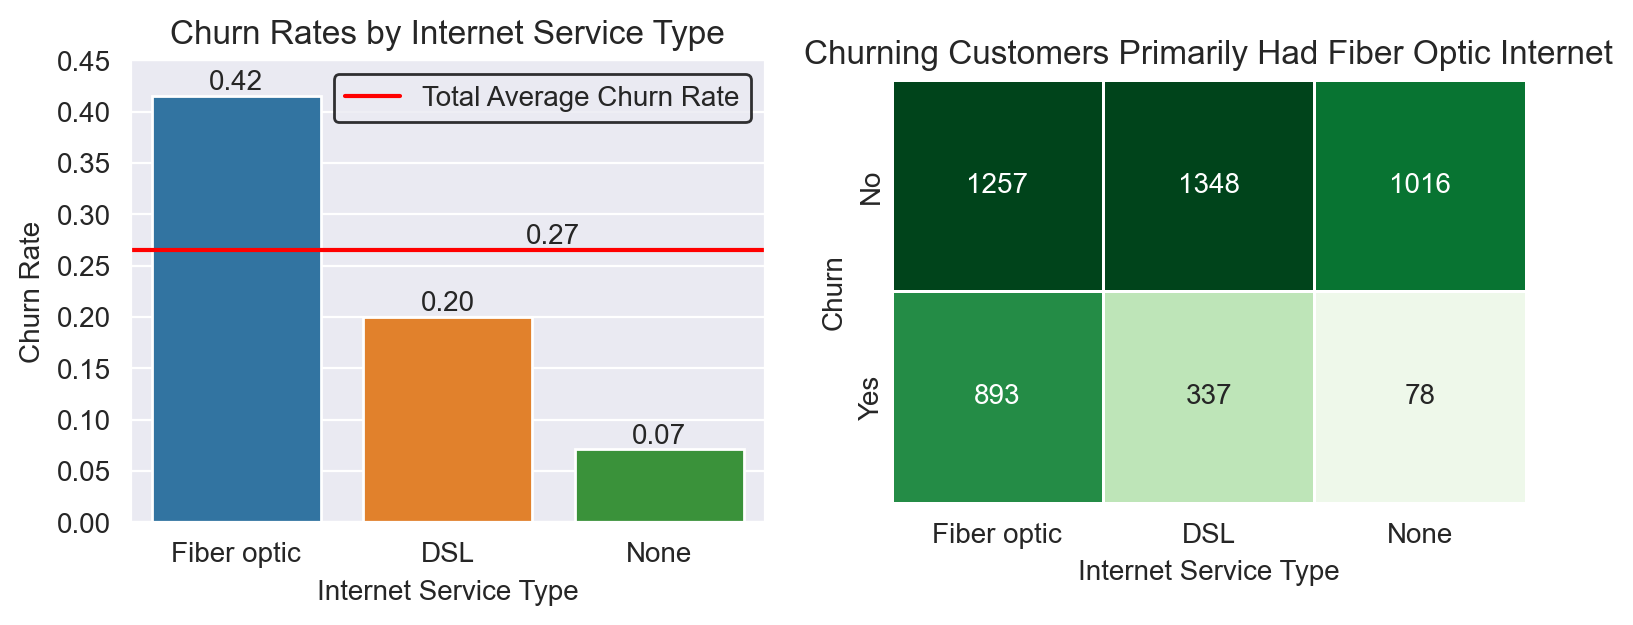

In [18]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

# first plot
order = telco.groupby('internet_service_type')['churn'].mean().sort_values(ascending=False).index
sns.barplot(x='internet_service_type', y='churn', data=telco, errorbar=None,  order=order,
            ax=axes[0])
# Annotate the bars
ax = plt.gca()
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
axes[0].set_title('Churn Rates by Internet Service Type')
axes[0].set_xlabel('Internet Service Type')
axes[0].set_ylabel('Churn Rate')
axes[0].set_yticks(np.arange(0, .46, 0.05))
# add line indicating estimate of all targets
axes[0].axhline(telco['churn'].mean(), label='Total Average Churn Rate', color='red')
axes[0].annotate(f'{telco["churn"].mean():.2f}', xy=(1.5, telco['churn'].mean()),
                ha='center', va='bottom')
# Display the legend
axes[0].legend(loc='upper right', edgecolor='black')

# second plot
sns.heatmap(pd.crosstab(telco['churn'], telco['internet_service_type'])[order],
            cmap='Greens', linewidths=.5, annot=True, square=True, fmt='.0f',
            vmin=0, vmax=1200, ax=axes[1], cbar=False)
axes[1].set_title('Churning Customers Primarily Had Fiber Optic Internet')
axes[1].set_xlabel('Internet Service Type')
axes[1].set_ylabel('Churn')
axes[1].set_yticklabels(['No', 'Yes'], ha='center')

###### 3. Stats test: Chi-Square Contingency Table Test

* state hypotheses and siginificance level
    * $H_0$: Churn is independent on Internet Service Type.
    * $H_a$: Churn is dependent on Internet Service Type.
    * $\alpha = .05$
* verify assumptions
    * Independence: Assumption met
    * Large sample sizes (`𝑛>5`  for each cell in contigency table):  Assumption met
    * Randomly sampled observations: Assumption met
* run test and interpret results


In [19]:
observed = pd.crosstab(telco['churn'],telco['internet_service_type'])
observed

internet_service_type   DSL  Fiber optic  None
churn                                         
0                      1348         1257  1016
1                       337          893    78

In [20]:
chi2, p_chi2, degf, expected = stats.chi2_contingency(observed)
chi2, p_chi2, degf, expected

(496.3690071532543,
 1.6399839689039795e-108,
 2,
 array([[1237.85453439, 1579.45830797,  803.68715764],
        [ 447.14546561,  570.54169203,  290.31284236]]))

In [21]:
observed - expected

internet_service_type         DSL  Fiber optic        None
churn                                                     
0                      110.145466  -322.458308  212.312842
1                     -110.145466   322.458308 -212.312842

In [22]:
print('Observed Values:\n', observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values:\n', expected)

# print the chi2 value, formatted to a float with 4 digits. 
print(f'---\nchi^2 = {chi2:.4f}\np = {p:.4f}')

Observed Values:
 [[1348 1257 1016]
 [ 337  893   78]]
---
Expected Values:
 [[1237.85453439 1579.45830797  803.68715764]
 [ 447.14546561  570.54169203  290.31284236]]


TypeError: unsupported format string passed to Rectangle.__format__

###### 4. Conclude

By comparing the observed and expected contingency tables, we can see that the observed values are far from the values we'd expect to see if the data were independent. This, along with a very low p value and high $\chi^2$ statistic, allows us to conclude that **there is a significant relationship between churners and their internet service type**.

---
Paying by electronic check relation to churn

###### 2. Visualize

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

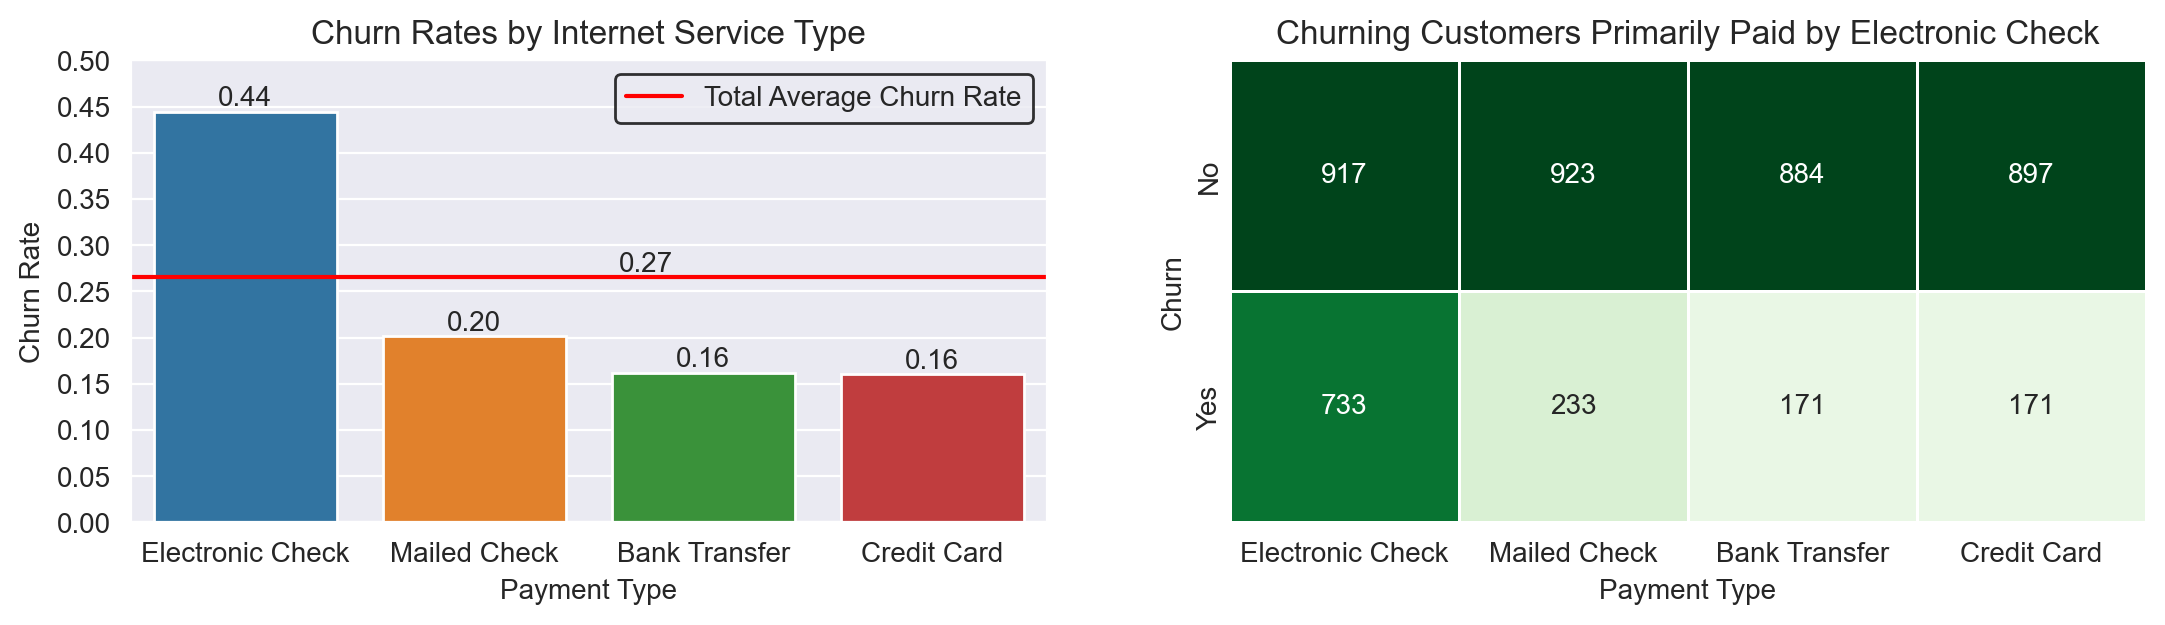

In [24]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(13, 3))

# first plot
order = telco.groupby('payment_type')['churn'].mean().sort_values(ascending=False).index
sns.barplot(x='payment_type', y='churn', data=telco, errorbar=None, order=order, ax=axes[0])
# Annotate the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
axes[0].set_title('Churn Rates by Internet Service Type')
axes[0].set_xlabel('Payment Type')
axes[0].set_xticklabels(['Electronic Check', 'Mailed Check', 'Bank Transfer', 'Credit Card'])
axes[0].set_ylabel('Churn Rate')
axes[0].set_yticks(np.arange(0, .51, 0.05))
# add line indicating estimate of all targets
axes[0].axhline(telco['churn'].mean(), label='Total Average Churn Rate', color='red')
axes[0].annotate(f'{telco["churn"].mean():.2f}', xy=(1.75, telco['churn'].mean()),
                ha='center', va='bottom')
# Display the legend
axes[0].legend(loc='upper right', edgecolor='black')

# second plot
sns.heatmap(pd.crosstab(telco['churn'], telco['payment_type'])[order], linewidths=.5, annot=True, fmt='.0f',
            cmap='Greens', vmin=100, vmax=850, ax=axes[1], cbar=False)
axes[1].set_title('Churning Customers Primarily Paid by Electronic Check')
axes[1].set_xlabel('Payment Type')
axes[1].set_xticklabels(['Electronic Check', 'Mailed Check', 'Bank Transfer', 'Credit Card'], rotation=0)
axes[1].set_ylabel('Churn')
axes[1].set_yticklabels(['No', 'Yes'], ha='center')

###### 4. Conclude

Those that pay by electronic check appear to churn around 66% more than the total average churn rate.

---
Contract type relation to churn

###### 2. Visualize

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

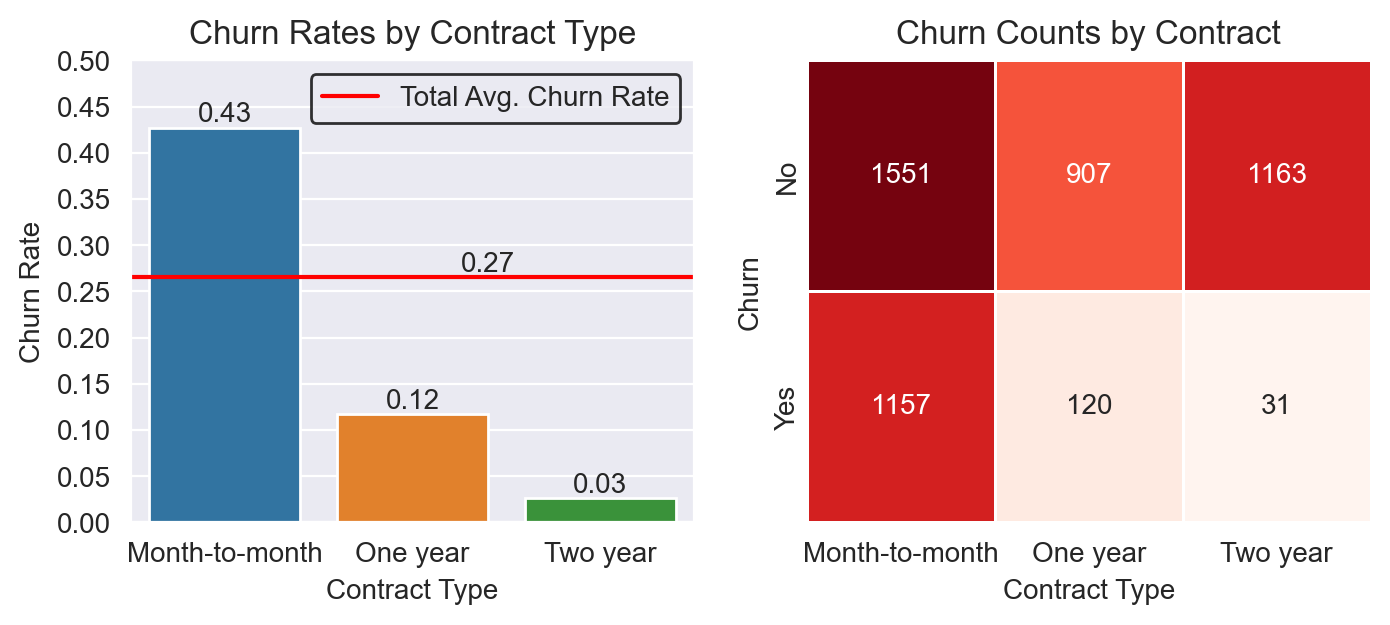

In [29]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# first plot
order = telco.groupby('contract_type')['churn'].mean().sort_values(ascending=False).index
sns.barplot(x='contract_type', y='churn', data=telco, errorbar=None, order=order, ax=axes[0])
# Annotate the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
axes[0].set_title('Churn Rates by Contract Type')
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Churn Rate')
axes[0].set_yticks(np.arange(0, .51, 0.05))
# add line indicating estimate of all targets
axes[0].axhline(telco['churn'].mean(), label='Total Avg. Churn Rate', color='red')
axes[0].annotate(f'{telco["churn"].mean():.2f}', xy=(1.4, telco['churn'].mean()),
                ha='center', va='bottom')
# Display the legend
axes[0].legend(loc='upper right', edgecolor='black')

# second plot
sns.heatmap(pd.crosstab(telco['churn'], telco['contract_type'])[order],
            cmap='Reds', linewidths=.5, annot=True, fmt='.0f',
            vmin=20, vmax=1600, ax=axes[1], cbar=False)
axes[1].set_title('Churn Counts by Contract')
axes[1].set_xlabel('Contract Type')
axes[1].set_ylabel('Churn')
axes[1].set_yticklabels(['No', 'Yes'], ha='center')

###### 4. Conclude

Those on month to month contracts churn 60% more than the average total churn rate. Those on two-year contracts rarely churn.

---
Gender relation to churn

###### 2. Visualize

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

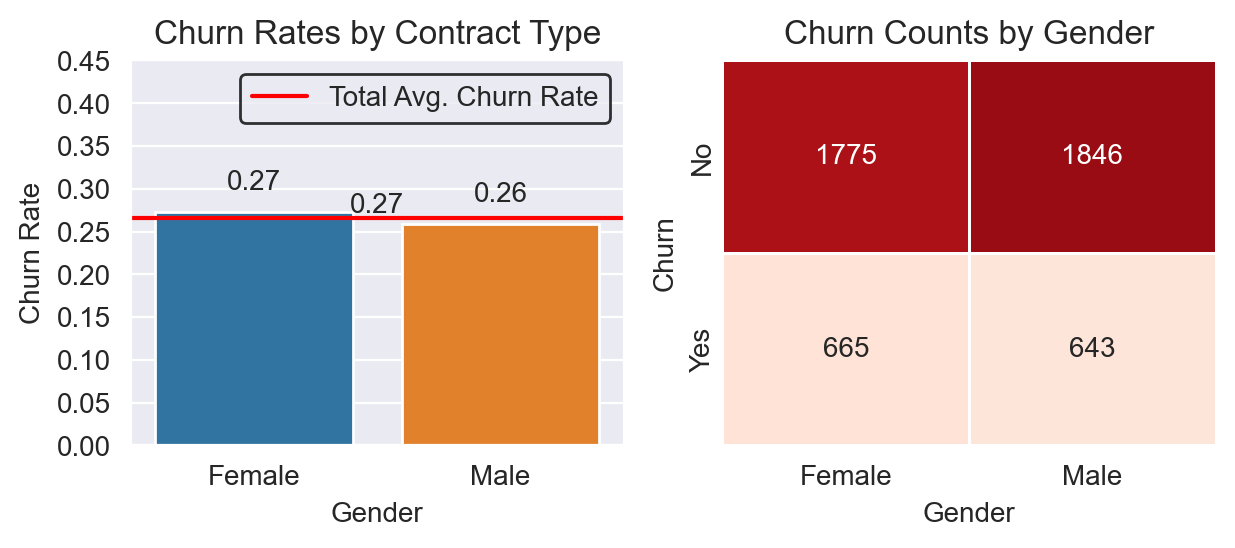

In [32]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(7, 2.5))

# first plot
order = telco.groupby('gender_male')['churn'].mean().sort_values(ascending=False).index
sns.barplot(x='gender_male', y='churn', data=telco, errorbar=None, order=order, ax=axes[0])
# Annotate the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height() + .02),
                ha='center', va='bottom')
axes[0].set_title('Churn Rates by Contract Type')
axes[0].set_xlabel('Gender')
axes[0].set_xticklabels(['Female', 'Male'])
axes[0].set_ylabel('Churn Rate')
axes[0].set_yticks(np.arange(0, .46, 0.05))
# add line indicating estimate of all targets
axes[0].axhline(telco['churn'].mean(), label='Total Avg. Churn Rate', color='red')
axes[0].annotate(f'{telco["churn"].mean():.2f}', xy=(.5, telco['churn'].mean()),
                ha='center', va='bottom')
# Display the legend
axes[0].legend(loc='upper right', edgecolor='black')

# second plot
sns.heatmap(pd.crosstab(telco['churn'], telco['gender_male'])[order],
            cmap='Reds', linewidths=.5, annot=True, fmt='.0f',
            vmin=500, vmax=2000, ax=axes[1], cbar=False)
axes[1].set_title('Churn Counts by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_xticklabels(['Female', 'Male'])
axes[1].set_ylabel('Churn')
axes[1].set_yticklabels(['No', 'Yes'], ha='center')

###### 4. Conclude

There appears to be little to no difference between the churn rates of males and females.

## Exploration Summary


Key Insights:
- Strong Drivers of Churn:
    - Tenure
    - Contract Type
    - Payment by Electronic Check
- Weak Drivers of Churn:
    - Gender

